In [1]:
%load_ext pycodestyle_magic
%flake8_on
# permet d'avoir un warning si ne respecte pas pep8

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# methode du coude
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance

In [4]:
data = pd.read_csv('Data/customers_explore_dist.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92039 entries, 0 to 92038
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            92039 non-null  object 
 1   delay                         92039 non-null  float64
 2   mean_payment_value            92039 non-null  float64
 3   mean_review_score             92039 non-null  float64
 4   credit_card                   92039 non-null  float64
 5   boleto                        92039 non-null  float64
 6   voucher                       92039 non-null  float64
 7   debit_card                    92039 non-null  float64
 8   not_defined                   92039 non-null  float64
 9   auto                          92039 non-null  float64
 10  construction                  92039 non-null  float64
 11  culture_books_multimedia      92039 non-null  float64
 12  electronics                   92039 non-null  float64
 13  f

In [6]:
data.head()

,customer_unique_id,delay,mean_payment_value,mean_review_score,credit_card,boleto,voucher,debit_card,not_defined,auto,...,home_furniture,other,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes,plusieurs_payments_type
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,141.90,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0,0.0,109.070238,1,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,27.19,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,16.257268,0,0,0
2,0000f46a3911fa3c0805444483337064,0.0,86.22,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0.0,520.447834,1,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,43.62,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,2471.204643,1,0,0
4,0004aac84e0df4da2b147fca70cf8255,0.0,196.89,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,154.585974,1,0,0


In [7]:
X = data.drop('customer_unique_id', axis=1)

In [8]:
from sklearn import preprocessing

On va tester un MinMaxSaler car on a pas mal de valeurs entre 0 et 1 ce qui gardera toutes les 'distances' dans le même ordre de grandeur et un StandardScaler

In [9]:
scalernorm = preprocessing.StandardScaler().fit(X)
X_norm = scalernorm.transform(X)

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_scale = scaler.transform(X)

# recherche nb clusters

## Avec X_scale

In [16]:
from sklearn.cluster import KMeans

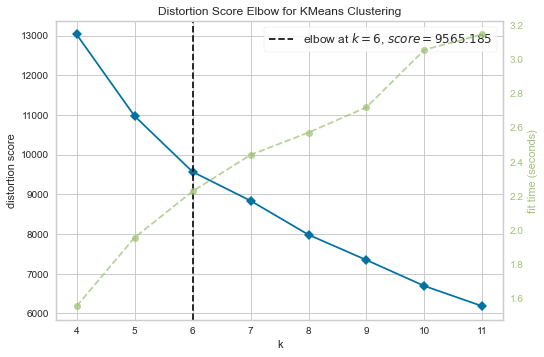

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# methode du coude (somme distance aux centroids)
model = KMeans(random_state=42)  # rdm_state pour stabilité
visualizer = KElbowVisualizer(model, k=(4, 12))

visualizer.fit(X_scale)
visualizer.poof()  # afficher

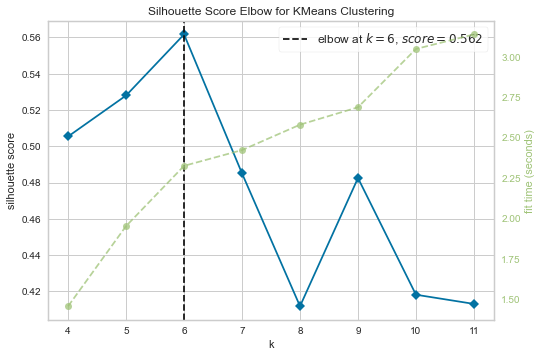

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [13]:
# avec silhouette
visualizer = KElbowVisualizer(model, k=(4, 12), metric='silhouette')

visualizer.fit(X_scale)
visualizer.poof()

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


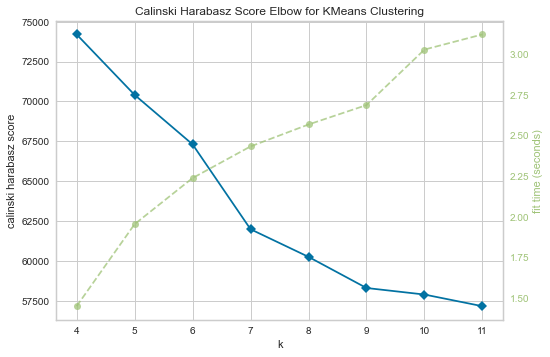

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [16]:
visualizer = KElbowVisualizer(model, k=(4, 12), metric='calinski_harabasz')

visualizer.fit(X_scale)
visualizer.poof()

## Avec X_norm

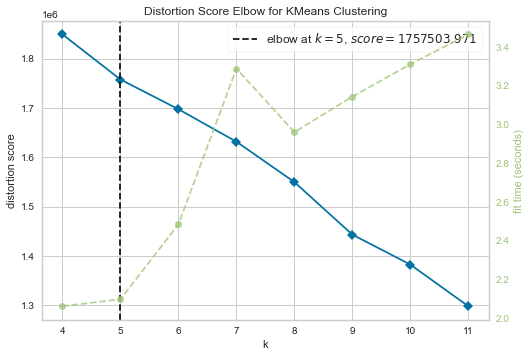

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
visualizer = KElbowVisualizer(model, k=(4, 12))

visualizer.fit(X_norm)
visualizer.poof()

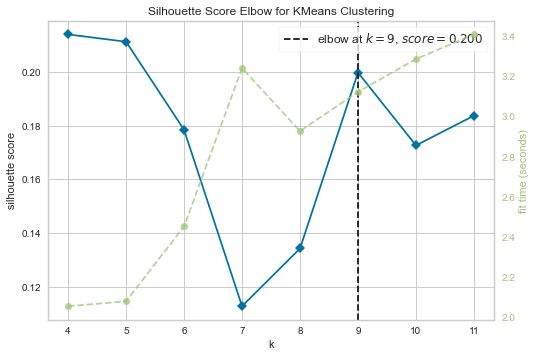

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
visualizer = KElbowVisualizer(model, k=(4, 12), metric='silhouette')

visualizer.fit(X_norm)
visualizer.poof()

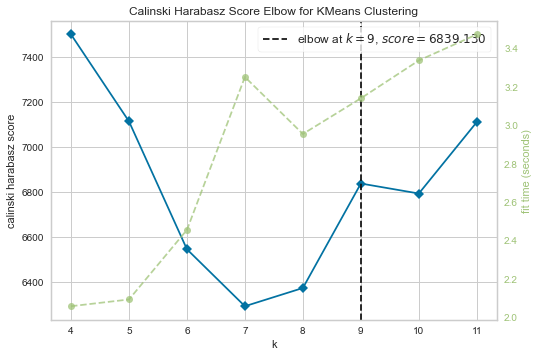

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
visualizer = KElbowVisualizer(model, k=(4, 12), metric='calinski_harabasz')

visualizer.fit(X_norm)
visualizer.poof()

# silhouette plot

## avec x_scale

In [12]:
model6 = KMeans(n_clusters=6, random_state=42)

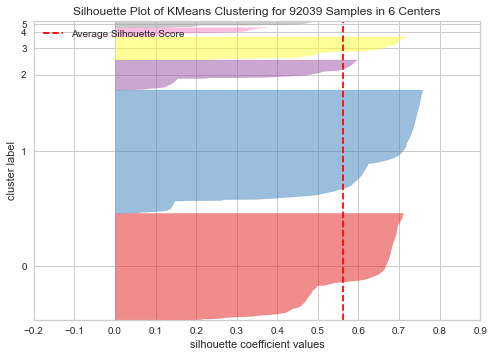

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92039 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
visualizer = SilhouetteVisualizer(model6)

visualizer.fit(X_scale)
visualizer.poof()

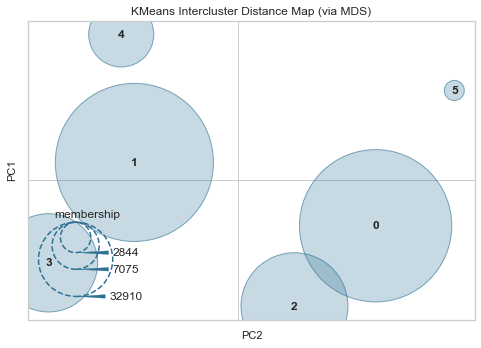

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [13]:
visualizer = InterclusterDistance(model6)

visualizer.fit(X_scale)
visualizer.show()

## avec x_norm

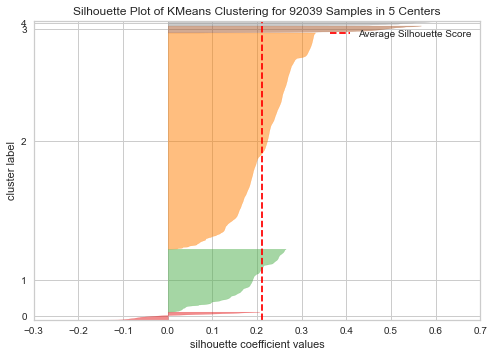

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92039 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# on prendra 5 car 9 est trop élevé
modelnorm = KMeans(n_clusters=5, random_state=42)

visualizer = SilhouetteVisualizer(modelnorm)

visualizer.fit(X_norm)
visualizer.poof()

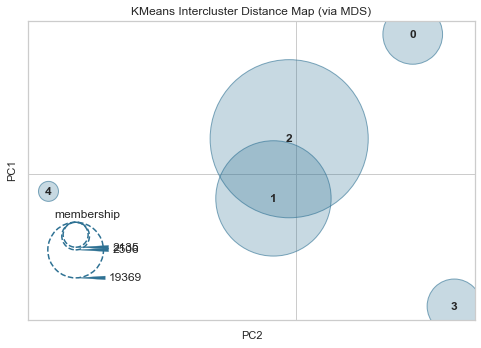

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [16]:
visualizer = InterclusterDistance(modelnorm)

visualizer.fit(X_norm)
visualizer.show()

# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca_scale = PCA(n_components=X.shape[1])
pca_scale.fit(X_scale)

PCA(n_components=25)

In [14]:
pca_scale.explained_variance_ratio_

array([5.20490534e-01, 2.31230988e-01, 6.63246765e-02, 5.65196176e-02,
       5.16363476e-02, 2.47898432e-02, 9.38740852e-03, 9.01708668e-03,
       7.19269914e-03, 3.77235627e-03, 3.59915806e-03, 2.86504750e-03,
       2.08617201e-03, 2.01402789e-03, 1.75867868e-03, 1.66204973e-03,
       1.42070419e-03, 1.23266882e-03, 1.07031018e-03, 8.70732829e-04,
       4.27879307e-04, 3.69591209e-04, 1.87029430e-04, 5.20254670e-05,
       2.23674940e-05])

In [15]:
np.cumsum(pca_scale.explained_variance_ratio_*100)

array([ 52.04905335,  75.17215216,  81.80461982,  87.45658158,
        92.62021634,  95.09920066,  96.03794151,  96.93965018,
        97.65892009,  98.03615572,  98.39607153,  98.68257628,
        98.89119348,  99.09259627,  99.26846413,  99.43466911,
        99.57673953,  99.70000641,  99.80703743,  99.89411071,
        99.93689864,  99.97385776,  99.9925607 ,  99.99776325,
       100.        ])

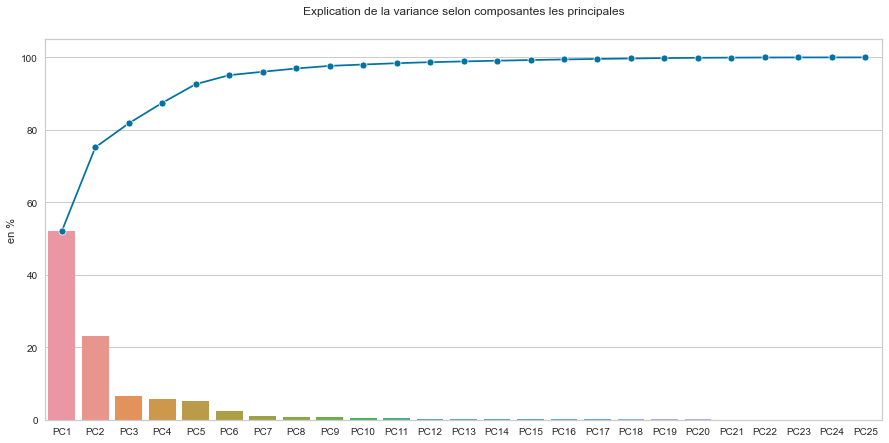

In [16]:
fig = plt.figure(figsize=(15, 7))

xticks = ['PC{}'.format(i+1) for i in np.arange(X.shape[1])]

sns.lineplot(x=xticks, y=np.cumsum(pca_scale.explained_variance_ratio_*100),
             marker='o')
sns.barplot(x=xticks, y=pca_scale.explained_variance_ratio_*100)

plt.title("Explication de la variance selon composantes les principales",
          y=1.05)
ylabel = plt.ylabel('en %')

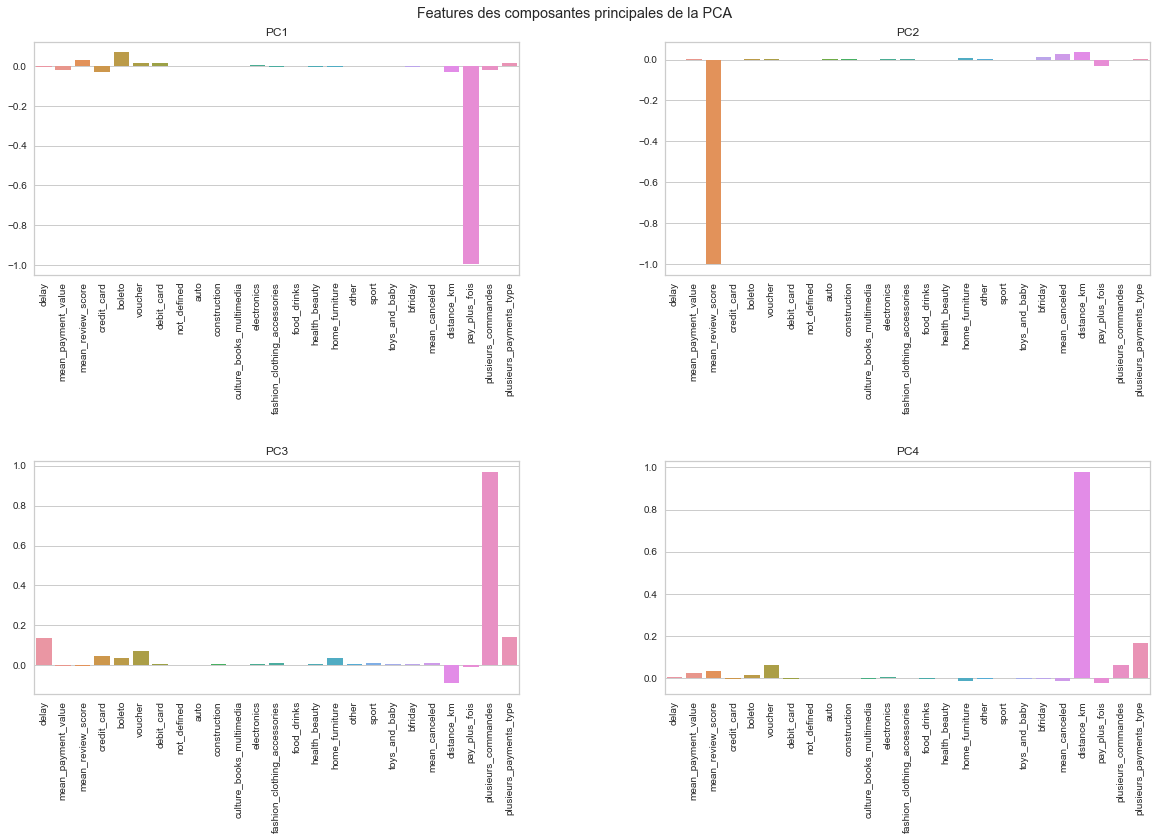

In [41]:
# regarder les composante sprincipales
fig = plt.figure(figsize=(20, 12))
for i, j in enumerate(['PC1', 'PC2', 'PC3', 'PC4']):
    plt.subplot(2, 2, i+1)
    ax = sns.barplot(x=data.columns[1:], y=pca_scale.components_[i])
    plt.xticks(rotation=90)
    ax.set_title(j)
plt.gcf().subplots_adjust(wspace=0.3, hspace=0.8)
plt.suptitle("Features des composantes principales de la PCA", y=0.92)
plt.show()

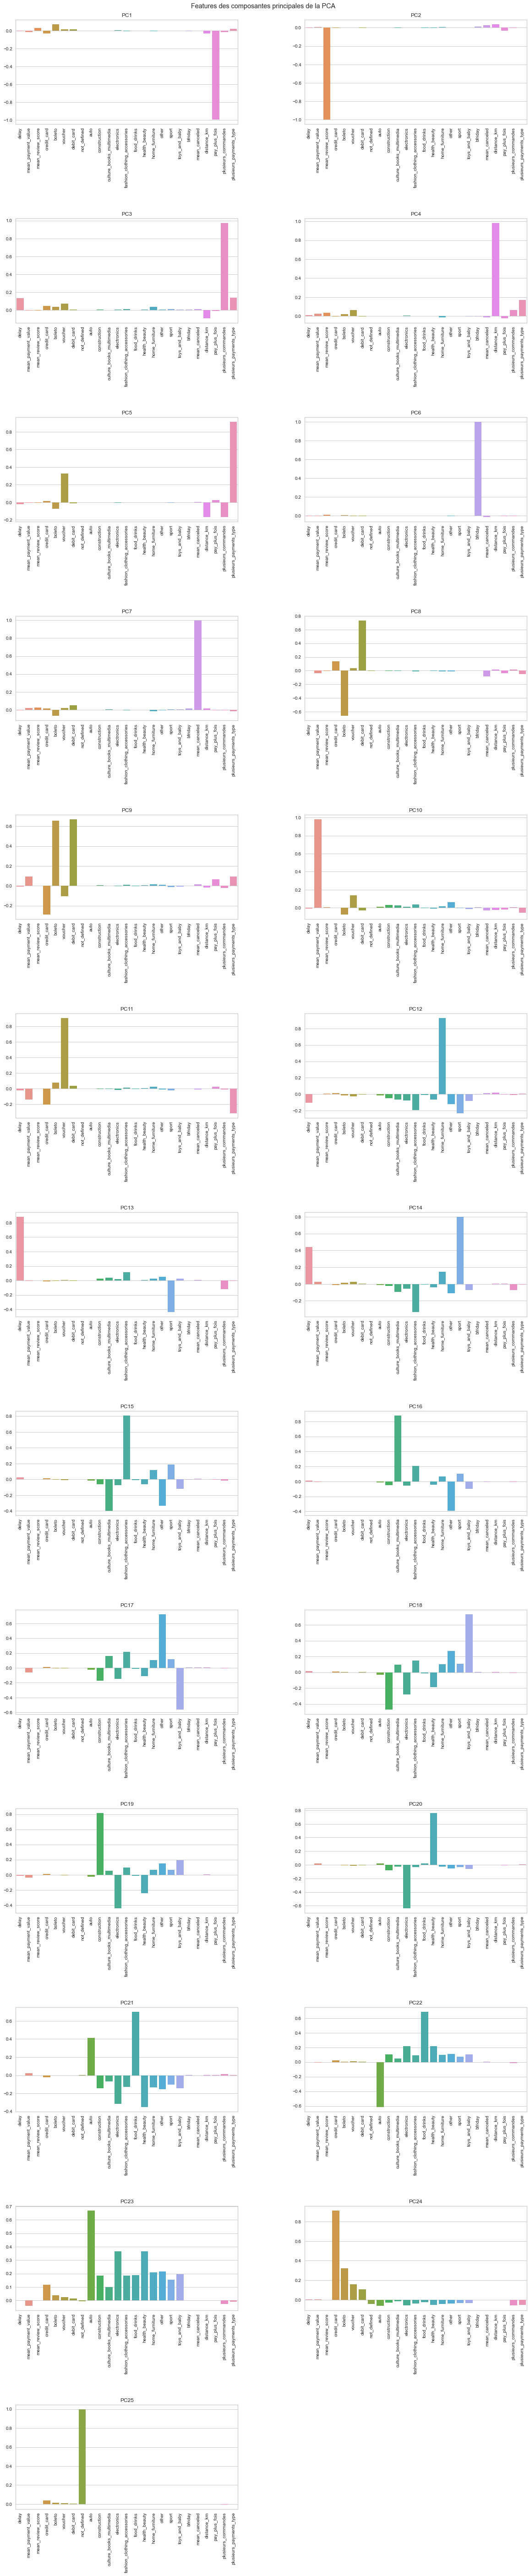

In [39]:
fig = plt.figure(figsize=(20, 100))
for i, j in enumerate(xticks):
    plt.subplot(13, 2, i+1)
    ax = sns.barplot(x=data.columns[1:], y=pca_scale.components_[i])
    plt.xticks(rotation=90)
    ax.set_title(j)
plt.gcf().subplots_adjust(wspace=0.3, hspace=0.9)
plt.suptitle("Features des composantes principales de la PCA", y=0.885)
plt.show()

In [58]:
#autre façon de voir

def cercle_correl(axe1, axe2):

    (fig, ax) = plt.subplots(figsize=(8, 8))
    for i in range(0, pca_scale.components_.shape[1]):
        ax.arrow(0,
                 0,  # flèche origine
                 pca_scale.components_[axe1, i],
                 pca_scale.components_[axe2, i],
                 head_width=0.03,
                 head_length=0.03,
                 length_includes_head=True)

    for i in np.where((abs(pca_scale.components_[axe1]) > 0.1) |
                      (abs(pca_scale.components_[axe2]) > 0.1))[0]:
        plt.text(pca_scale.components_[axe1, i] + 0.05,
                 pca_scale.components_[axe2, i] + 0.05,
                 X.columns.values[i])

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # cercle
    plt.axis('equal')
    ax.set_xlabel(xticks[axe1])
    ax.set_ylabel(xticks[axe2])
    ax.set_title('Cercle de corrélation')
    plt.show()

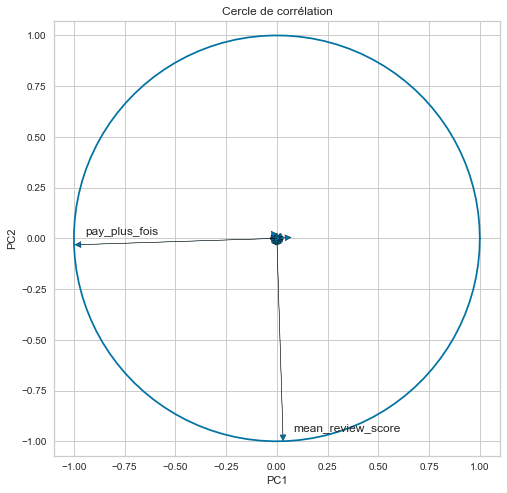

In [59]:
cercle_correl(0, 1)

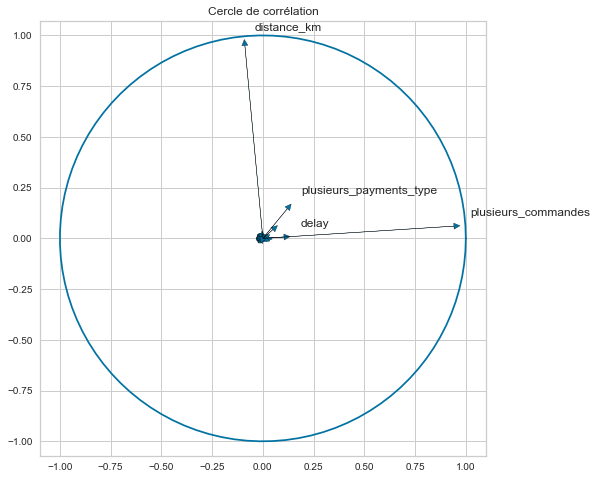

In [53]:
cercle_correl(2, 3)

In [25]:
X_pca = pd.DataFrame(pca_scale.transform(X_scale))
X_pca.columns = xticks

In [19]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-0.473380,-0.248366,-0.029162,-0.146014,0.016773,-0.011979,-0.001383,-0.003968,0.003420,-0.007379,...,0.001074,0.000281,-0.001376,-0.001777,-0.002407,0.002230,-0.001714,-0.004725,0.000612,0.000017
1,0.515551,0.031598,-0.017206,-0.157173,-0.002527,-0.010731,-0.003458,0.037354,-0.064918,-0.012281,...,-0.004871,-0.007620,-0.014355,-0.013882,0.040415,-0.007947,0.002719,0.000956,0.000303,0.000008
2,-0.491812,0.254620,-0.038941,-0.051076,-0.000517,-0.016908,-0.013419,0.000562,-0.001008,-0.020263,...,-0.027911,0.043571,0.011488,0.005693,-0.003283,0.000093,-0.000208,-0.002625,0.000584,0.000013
3,-0.499288,0.024541,-0.089825,0.491826,-0.091688,-0.012217,0.001577,0.010900,-0.012692,-0.044942,...,-0.003906,-0.007761,-0.014755,-0.019384,-0.026068,-0.002912,0.002288,-0.000155,0.000318,0.000054
4,-0.473518,-0.248056,-0.032093,-0.132254,0.014463,-0.012138,-0.000197,-0.003606,0.003123,0.003039,...,-0.005009,-0.012326,-0.018647,-0.024026,-0.026979,-0.003230,0.001659,-0.001544,0.000608,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92034,-0.495068,-0.227817,-0.081557,0.383122,-0.072136,-0.012399,0.015522,-0.008425,0.029642,0.371510,...,-0.007680,-0.038368,-0.021861,-0.039476,0.080960,-0.014770,0.010641,0.003538,-0.000159,0.000121
92035,0.503347,0.046777,-0.055642,0.255527,-0.072207,-0.009270,0.003390,0.045067,-0.072791,-0.011461,...,-0.010810,-0.047912,0.058263,0.015466,0.000233,-0.002669,0.001291,-0.000048,-0.000082,0.000020
92036,0.511030,-0.202775,-0.057137,0.264850,-0.073082,-0.006886,0.010110,0.043719,-0.071171,-0.003206,...,-0.003092,-0.002545,-0.004288,-0.001842,0.005682,0.029764,-0.037812,0.017424,-0.000308,0.000032
92037,-0.477622,-0.243392,-0.043599,-0.000992,-0.007496,-0.011592,0.001117,-0.001233,0.000200,-0.010375,...,0.015053,0.013326,0.006278,0.003717,-0.003331,-0.000994,0.000609,-0.000629,-0.000545,0.000009


In [21]:
X_pca['KMean_cluster'] = model6.labels_

In [26]:
custompal = {i: sns.color_palette('tab10')[i] for i in np.arange(6)}

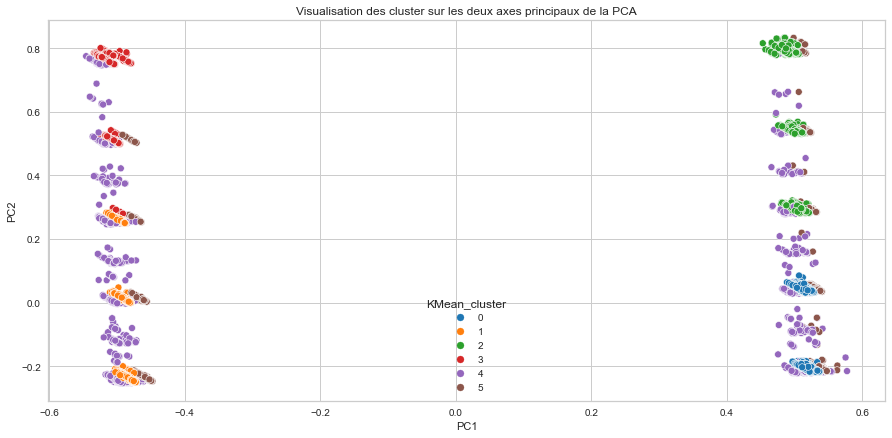

In [23]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_pca, x='PC1', y='PC2',
                hue='KMean_cluster', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les deux axes principaux de la PCA')

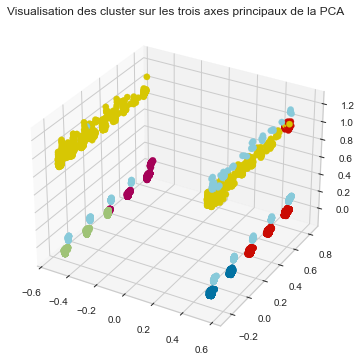

In [24]:
# %matplotlib widget (widget jupyterlab pour tourner 3D)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# recup couleurs seaborn à use
cmap = ListedColormap(sns.color_palette().as_hex())

x = X_pca.PC1
y = X_pca.PC2
z = X_pca.PC3

# plot
ax.scatter(x, y, z, s=40, c=X_pca.KMean_cluster,
           marker='o', cmap=cmap, alpha=1)
plt.title('Visualisation des cluster sur les trois axes principaux de la PCA')

plt.show()

In [13]:
# 4 composants -> 87% variance
pca_scale4 = PCA(n_components=4)
pca_scale4.fit(X_scale)

PCA(n_components=4)

In [14]:
X_scale4 = pca_scale4.transform(X_scale)

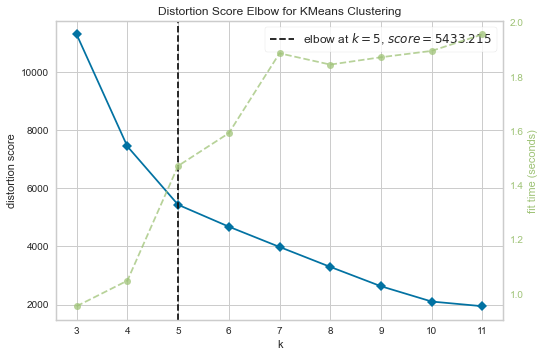

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# entrainement apres pca
# %matplotlib inline (pour ressortir du widget)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(3, 12))

visualizer.fit(X_scale4)
visualizer.poof()

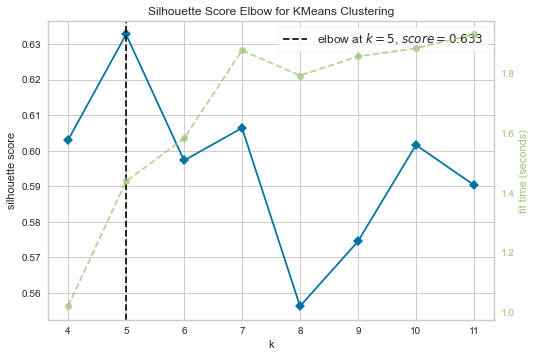

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [38]:
visualizer = KElbowVisualizer(model, k=(4, 12), metric='silhouette')

visualizer.fit(X_scale4)
visualizer.poof()

In [17]:
# on a un cluster en moins
km_pca = KMeans(n_clusters=5, random_state=42)

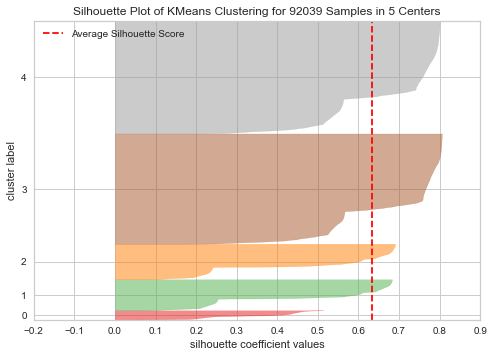

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 92039 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
visualizer = SilhouetteVisualizer(km_pca)

visualizer.fit(X_scale4)
visualizer.poof()

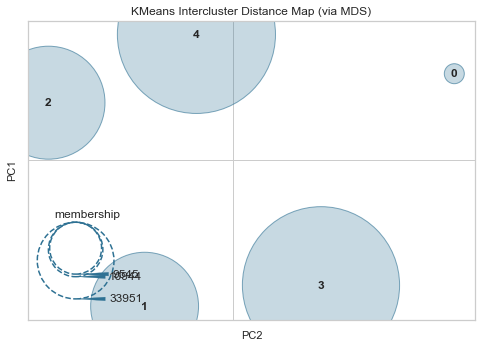

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [19]:
visualizer = InterclusterDistance(km_pca)

visualizer.fit(X_scale4)
visualizer.show()

In [20]:
X_scale4 = pd.DataFrame(X_scale4)

In [21]:
xticks4 = ['PC{}'.format(i+1) for i in np.arange(4)]

In [22]:
X_scale4.columns = xticks4

In [23]:
X_scale4['KMean_pca'] = km_pca.labels_

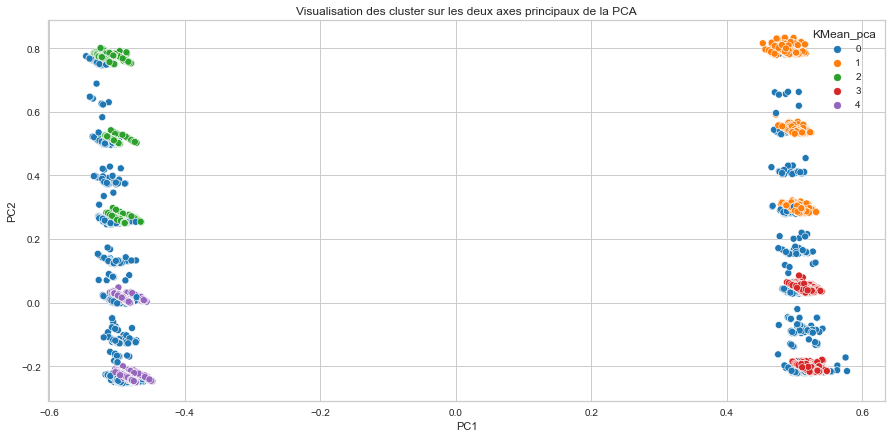

In [35]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_scale4, x='PC1', y='PC2',
                hue='KMean_pca', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les deux axes principaux de la PCA')

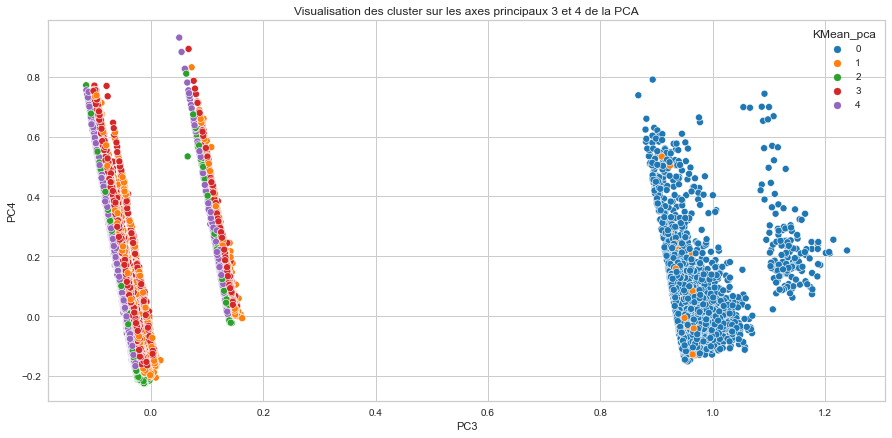

In [36]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_scale4, x='PC3', y='PC4',
                hue='KMean_pca', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les axes principaux 3 et 4 de la PCA')

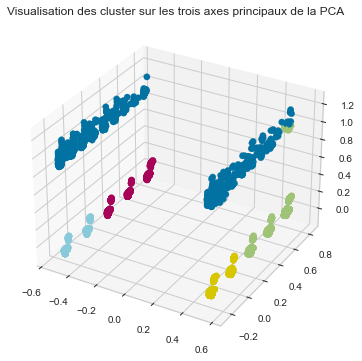

In [34]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# couleurs de seaborn
cmap = ListedColormap(sns.color_palette().as_hex())

x = X_scale4.PC1
y = X_scale4.PC2
z = X_scale4.PC3

# plot
ax.scatter(x, y, z, s=40, c=X_scale4.KMean_pca,
           marker='o', cmap=cmap, alpha=1)
plt.title('Visualisation des cluster sur les trois axes principaux de la PCA')
plt.show()

In [49]:
#pca avec X_norm pour voir
pcanorm = PCA(n_components=X.shape[1])
pcanorm.fit(X_norm)

PCA(n_components=25)

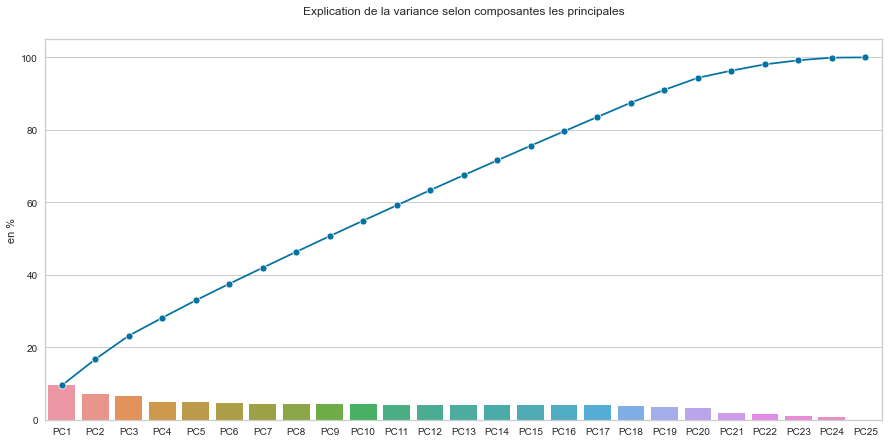

In [51]:
fig = plt.figure(figsize=(15, 7))

xticks = ['PC{}'.format(i+1) for i in np.arange(X.shape[1])]

sns.lineplot(x=xticks, y=np.cumsum(pcanorm.explained_variance_ratio_*100),
             marker='o')
sns.barplot(x=xticks, y=pcanorm.explained_variance_ratio_*100)

plt.title("Explication de la variance selon composantes les principales",
          y=1.05)
ylabel = plt.ylabel('en %')

Pour avoir >80% variance il faut 17 composantes, ce n'est pas une réduction 'intéressante'

# Analyse clusters

In [28]:
# indiquer les cluster dans le jeu de données
data['KMean_cluster'] = model6.labels_
data['KMean_pca'] = km_pca.labels_

In [36]:
clust_mean = data.groupby('KMean_cluster').mean()
clust_meanpca = data.groupby('KMean_pca').mean()

In [ ]:
clust_mean

,delay,mean_payment_value,mean_review_score,credit_card,boleto,voucher,debit_card,not_defined,auto,construction,...,other,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes,plusieurs_payments_type,KMean_pca
KMean_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,116.522002,4.747007,0.520632,0.416712,0.029505,0.033151,0.000000,0.047068,0.067517,...,0.110210,0.099544,0.073200,0.008478,0.000425,541.045561,0.000000,0.000000,0.000000,3.000000
1,0.000000,194.162450,4.573390,1.000000,0.000000,0.000000,0.000000,0.000000,0.041483,0.069576,...,0.126394,0.073758,0.074600,0.012600,0.000579,636.511309,1.000000,0.000000,0.000000,3.800400
2,0.069509,130.228453,1.882111,0.488569,0.448261,0.038899,0.031531,0.000108,0.045400,0.076065,...,0.120706,0.089717,0.074006,0.014953,0.017824,606.857263,0.000000,0.006826,0.000000,0.999567
3,0.000000,227.553709,1.221201,1.000000,0.000000,0.010459,0.000141,0.000000,0.054558,0.079859,...,0.139788,0.088198,0.077032,0.021908,0.028693,716.293709,1.000000,0.000000,0.010601,2.000000
4,82.691341,148.016562,4.173726,1.639592,0.387834,0.095288,0.026020,0.000000,0.063643,0.136076,...,0.182138,0.233474,0.125527,0.016174,0.010900,560.951005,0.664205,1.000000,0.028833,0.000352
5,2.788041,142.161497,4.187956,1.022901,0.008651,1.015776,0.000509,0.000000,0.039695,0.066158,...,0.120102,0.081425,0.075318,0.011196,0.006446,627.263682,0.278880,0.029517,1.000000,2.788804


In [38]:
clust_meanpca

,delay,mean_payment_value,mean_review_score,credit_card,boleto,voucher,debit_card,not_defined,auto,construction,...,other,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes,plusieurs_payments_type,KMean_cluster
KMean_pca,,,,,,,,,,,,,,,,,,,,,
0,82.852728,148.011346,4.161931,1.640620,0.385886,0.126678,0.025818,0.000000,0.063683,0.136661,...,0.181756,0.231325,0.126678,0.016523,0.011933,560.263471,0.650602,1.000000,0.048193,4.017212
1,0.063594,129.479836,1.886014,0.505815,0.433316,0.070194,0.030487,0.000105,0.045259,0.075223,...,0.120482,0.089157,0.073337,0.014877,0.017968,607.324471,0.000000,0.006286,0.033421,2.100471
2,0.000000,211.751778,1.848136,1.000000,0.000000,0.013615,0.000091,0.000000,0.048794,0.077303,...,0.136239,0.082876,0.077029,0.020102,0.018549,700.532433,1.000000,0.000000,0.013706,2.320358
3,0.000000,116.424332,4.746929,0.535330,0.403935,0.059262,0.032135,0.000000,0.046862,0.067568,...,0.110424,0.098907,0.073341,0.008453,0.000471,542.423764,0.000000,0.000000,0.030662,0.153309
4,0.000000,195.773164,4.747622,1.000000,0.000000,0.013605,0.000000,0.000000,0.041736,0.069061,...,0.125987,0.074019,0.074278,0.012163,0.000634,633.909931,1.000000,0.000000,0.013605,1.054419


## taille des clusters

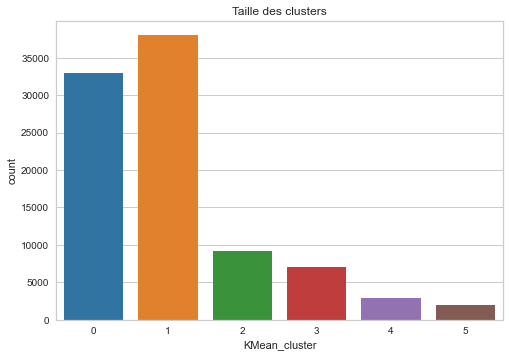

In [39]:
sns.countplot(data=data, x='KMean_cluster', palette=custompal)
title = plt.title('Taille des clusters')

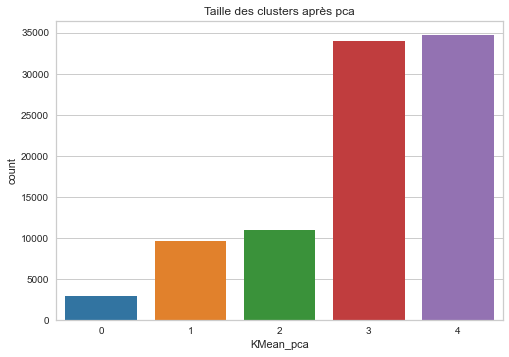

In [40]:
sns.countplot(data=data, x='KMean_pca', palette=custompal)
title = plt.title('Taille des clusters après pca')

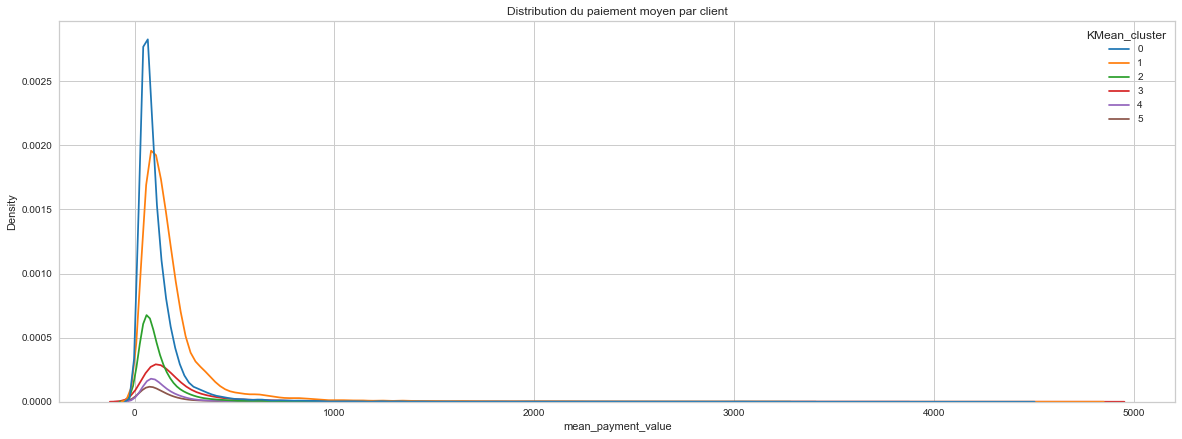

In [41]:
fig = plt.figure(figsize=(20, 7))
sns.kdeplot(data=data, x='mean_payment_value',
            hue='KMean_cluster', palette=custompal)
title = plt.title('Distribution du paiement moyen par client')

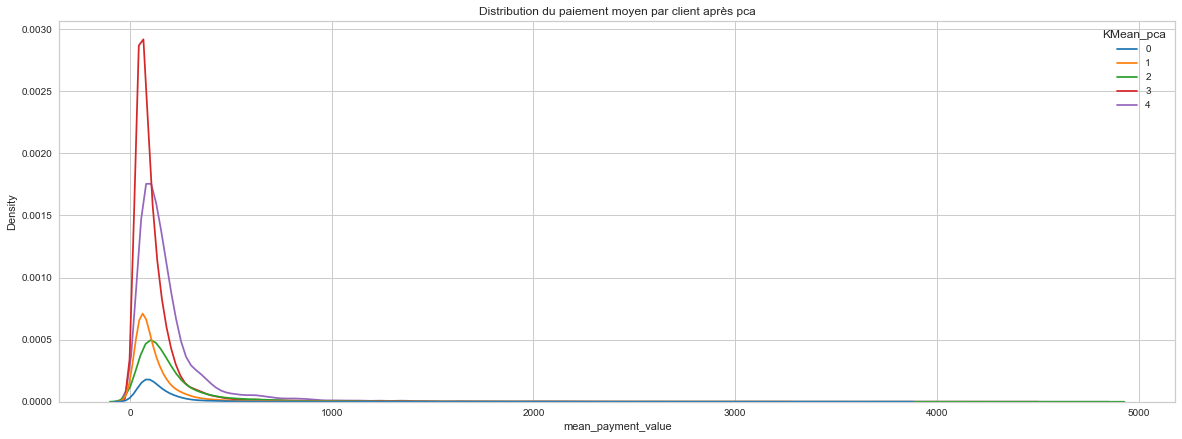

In [42]:
fig = plt.figure(figsize=(20, 7))
sns.kdeplot(data=data, x='mean_payment_value',
            hue='KMean_pca', palette=custompal)
title = plt.title('Distribution du paiement moyen par client après pca')

In [43]:
# variables à étudier
listeboxplot = ['delay', 'mean_payment_value',
                'mean_review_score', 'distance_km']

In [83]:
# recupérer les boxplot pour le model colmod

def boxplot(colmod):

    fig = plt.figure(figsize=(20, 90))

    for nb, var in enumerate(listeboxplot):

        fig.add_subplot(13, 2, nb+1)
        sns.boxplot(data=data, y=var, x=colmod,
                    showfliers=False, palette=custompal)
        plt.title(
            'Boxplots de la variable {} en fonction des clusters'.format(var))

    fig.suptitle(
        'Boxplot des variables {} avec les clusters de {}'.format(listeboxplot,
                                                                  colmod),
        y=0.89)

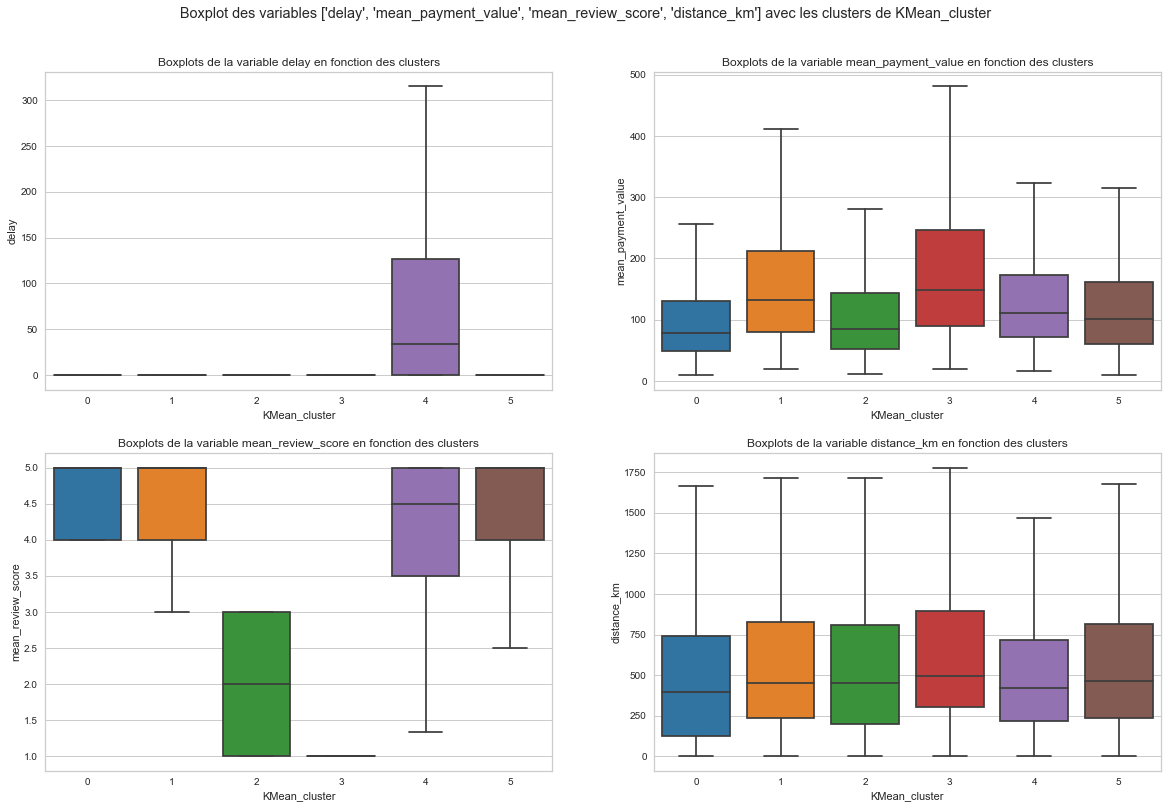

In [84]:
boxplot('KMean_cluster')

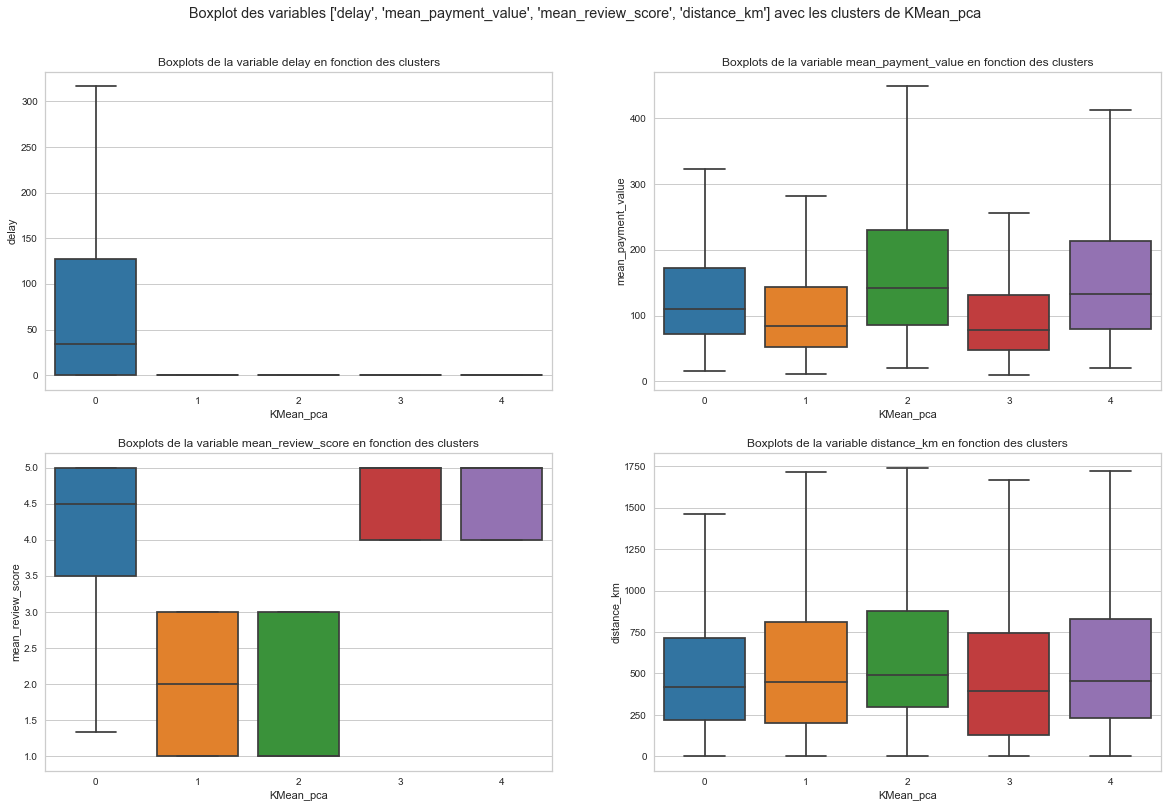

In [85]:
boxplot('KMean_pca')

In [47]:
data.columns

Index(['customer_unique_id', 'delay', 'mean_payment_value',
       'mean_review_score', 'credit_card', 'boleto', 'voucher', 'debit_card',
       'not_defined', 'auto', 'construction', 'culture_books_multimedia',
       'electronics', 'fashion_clothing_accessories', 'food_drinks',
       'health_beauty', 'home_furniture', 'other', 'sport', 'toys_and_baby',
       'bfriday', 'mean_canceled', 'distance_km', 'pay_plus_fois',
       'plusieurs_commandes', 'plusieurs_payments_type', 'KMean_cluster',
       'KMean_pca'],
      dtype='object')

In [48]:
clust_count = data.groupby('KMean_cluster').sum()
clust_countpca = data.groupby('KMean_pca').sum()

## produits

In [49]:
produits = ['auto', 'construction', 'culture_books_multimedia',
            'electronics', 'fashion_clothing_accessories',
            'food_drinks', 'health_beauty', 'home_furniture',
            'other', 'sport', 'toys_and_baby']

In [50]:
pal = {pdt: sns.color_palette("Paired")[i] for i, pdt in enumerate(produits)}

In [51]:
#calcul pourcentage de la variable dans le cluster

def perc_var_clust(var, tot, clust, colmod):

    if colmod == 'KMean_pca':
        df = clust_countpca
    elif colmod == 'KMean_cluster':
        df = clust_count
    elif colmod == 'DB_cluster4':
        df = clust_countdb

    nb_var = df.at[clust, var]
    tot_var_clust = 0

    for variable in tot:

        tot_var_clust += df.at[clust, variable]

    return round(nb_var*100/tot_var_clust, 2)

In [52]:
def prodclust(colmod):

    fig = plt.figure(figsize=(20, 35))
    x = data[colmod].unique()

    for i, pdt in enumerate(produits):

        y = []

        for clust in x:
            y.append(perc_var_clust(pdt, produits, clust, colmod))

        fig.add_subplot(6, 2, i+1)
        sns.barplot(x=x, y=y, palette=custompal)
        plt.title('Pourcentage de produit {} acheté par cluster'.format(pdt))

    fig.suptitle('Pourcentage d\'achat des produits pour {}'.format(colmod),
                 y=0.9)

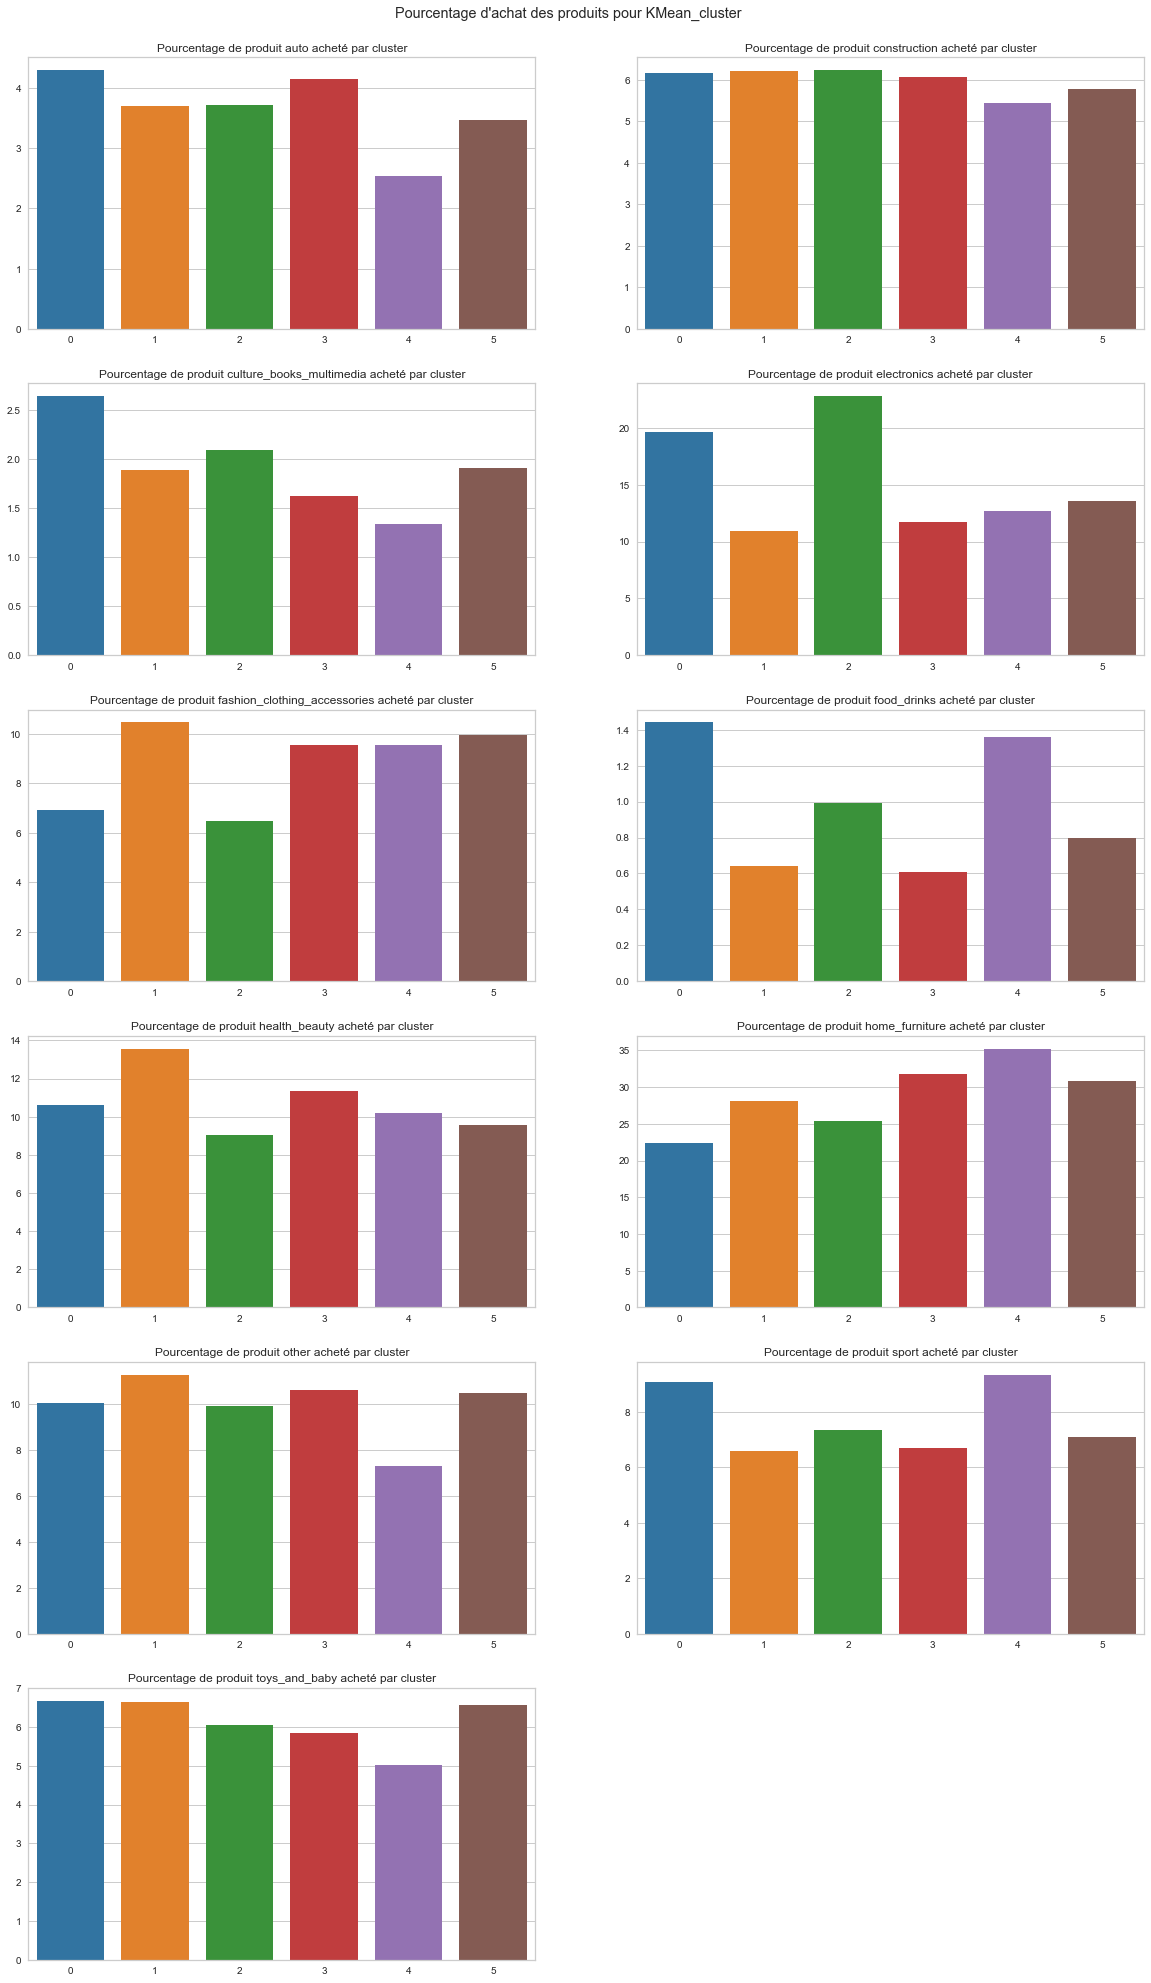

In [53]:
prodclust('KMean_cluster')

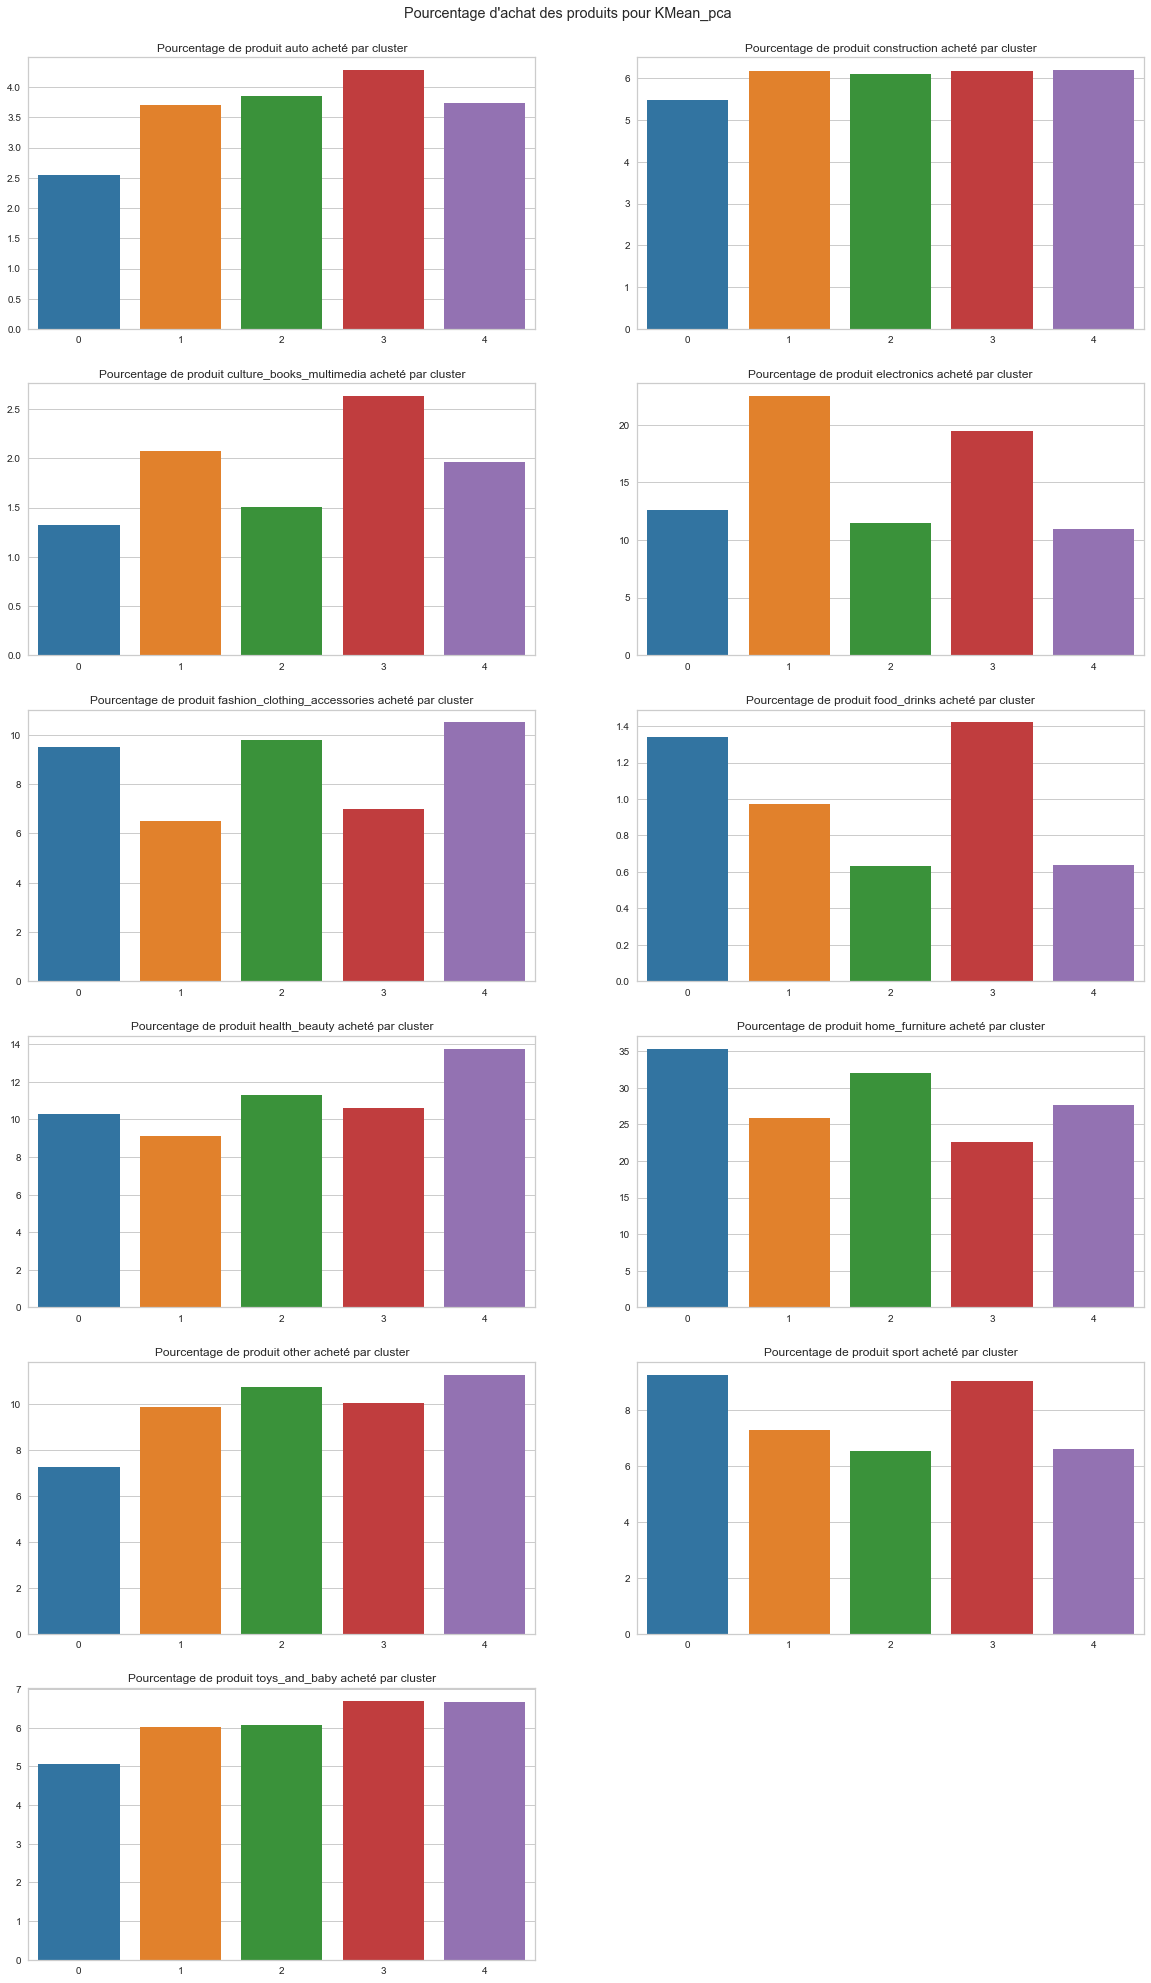

In [54]:
prodclust('KMean_pca')

In [55]:
# regarder les 5 produits les plus achetés pour chaque cluster

In [56]:
pdt_perc = pd.DataFrame(index=produits)
pdt_perc_pca = pd.DataFrame(index=produits)

In [57]:
# remplir les df avec les %
def remplir_df(df, tot, colmod):

    x = data[colmod].unique()

    for clu in x:

        perc = []

        for item in tot:

            perc.append(perc_var_clust(item, tot, clu, colmod))

        df[clu] = perc

In [58]:
remplir_df(pdt_perc, produits, 'KMean_cluster')
remplir_df(pdt_perc_pca, produits, 'KMean_pca')

In [59]:
pdt_perc

,1,0,3,5,2,4
auto,3.70,4.29,4.14,3.46,3.72,2.54
construction,6.20,6.16,6.06,5.77,6.23,5.44
culture_books_multimedia,1.89,2.64,1.62,1.91,2.09,1.34
electronics,10.91,19.67,11.76,13.59,22.78,12.68
fashion_clothing_accessories,10.46,6.93,9.53,9.95,6.46,9.53
food_drinks,0.64,1.44,0.61,0.80,0.99,1.36
health_beauty,13.57,10.62,11.34,9.59,9.03,10.22
home_furniture,28.14,22.44,31.78,30.77,25.40,35.24
other,11.27,10.05,10.61,10.48,9.89,7.28
sport,6.58,9.08,6.70,7.10,7.35,9.34


In [60]:
pdt_perc_pca

,4,3,2,1,0
auto,3.74,4.28,3.85,3.71,2.55
construction,6.19,6.17,6.10,6.17,5.47
culture_books_multimedia,1.96,2.63,1.51,2.07,1.32
electronics,10.97,19.51,11.45,22.48,12.59
fashion_clothing_accessories,10.50,7.01,9.80,6.50,9.50
food_drinks,0.64,1.42,0.63,0.97,1.34
health_beauty,13.76,10.58,11.32,9.09,10.29
home_furniture,27.67,22.61,31.96,25.79,35.32
other,11.29,10.08,10.75,9.88,7.28
sport,6.63,9.03,6.54,7.31,9.27


In [61]:
def top_pdt(colmod):

    x = data[colmod].unique()

    fig = plt.figure(figsize=(20, 30))

    for i, clust in enumerate(x):

        if colmod == 'KMean_pca':
            df = pdt_perc_pca.sort_values(by=clust, ascending=False)[:5]
        elif colmod == 'KMean_cluster':
            df = pdt_perc.sort_values(by=clust, ascending=False)[:5]
        elif colmod == 'DB_cluster4':
            df = pdt_perc_dbpca.sort_values(by=clust, ascending=False)[:5]

        fig.add_subplot(6, 2, i+1)
        sns.barplot(data=df, y=clust, x=df.index, palette=pal)
        plt.title(
            '% des produits les plus vendus pour le cluster {}'.format(clust))

    fig.suptitle('% du top 5 des produits achetés pour {}'.format(colmod),
                 y=0.9)

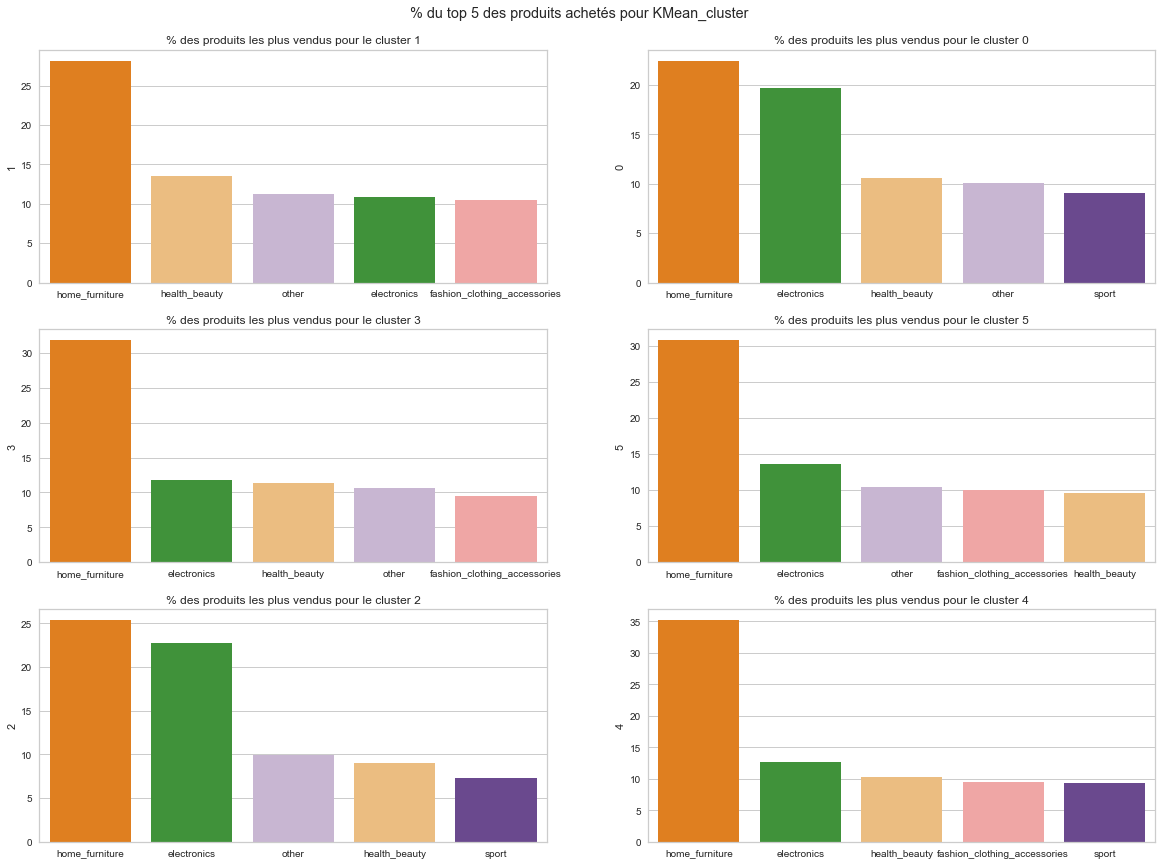

In [62]:
top_pdt('KMean_cluster')

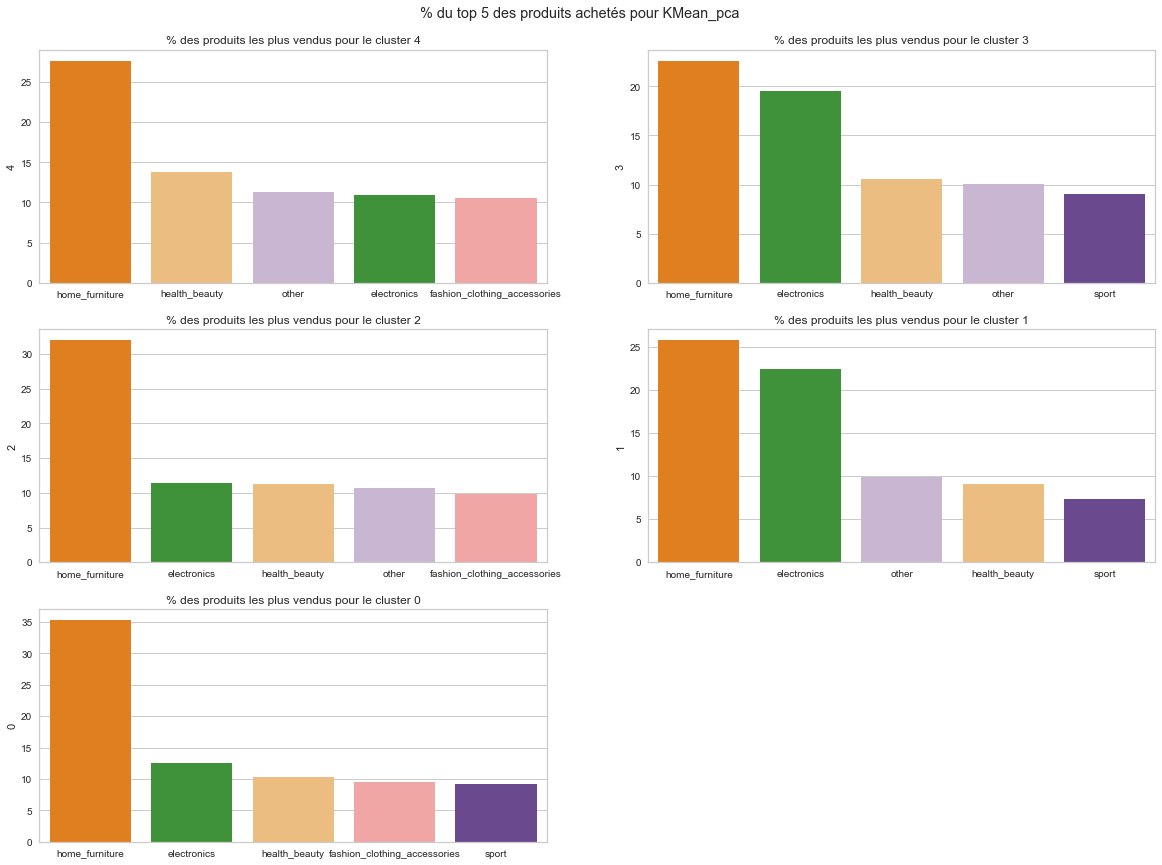

In [63]:
top_pdt('KMean_pca')

## moyens de payments

### repartition

In [64]:
payments = ['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined']

In [65]:
pay_perc = pd.DataFrame(index=payments)
pay_perc_pca = pd.DataFrame(index=payments)

In [66]:
remplir_df(pay_perc, payments, 'KMean_cluster')
remplir_df(pay_perc_pca, payments, 'KMean_pca')

In [67]:
pay_perc

,1,0,3,5,2,4
credit_card,100.0,52.06,98.95,49.95,48.50,76.31
boleto,0.0,41.67,0.00,0.42,44.50,18.05
voucher,0.0,2.95,1.03,49.60,3.86,4.43
debit_card,0.0,3.32,0.01,0.02,3.13,1.21
not_defined,0.0,0.00,0.00,0.00,0.01,0.00


In [68]:
pay_perc_pca

,4,3,2,1,0
credit_card,98.66,51.94,98.65,48.64,75.29
boleto,0.00,39.19,0.00,41.67,17.71
voucher,1.34,5.75,1.34,6.75,5.81
debit_card,0.00,3.12,0.01,2.93,1.18
not_defined,0.00,0.00,0.00,0.01,0.00


In [69]:
pal2 = {pdt: sns.color_palette()[i] for i, pdt in enumerate(payments)}

In [70]:
def pai_clust(df, colmod):

    fig = plt.figure(figsize=(20, 15))
    x = data[colmod].unique()

    for i, clust in enumerate(x):

        fig.add_subplot(3, 2, i+1)
        sns.barplot(data=df, y=clust, x=pay_perc.index, palette=pal2)
        plt.title('% des paiements pour le cluster {}'.format(clust))

    fig.suptitle('% des moyens de paiement pour {}'.format(colmod),
                 y=0.9)

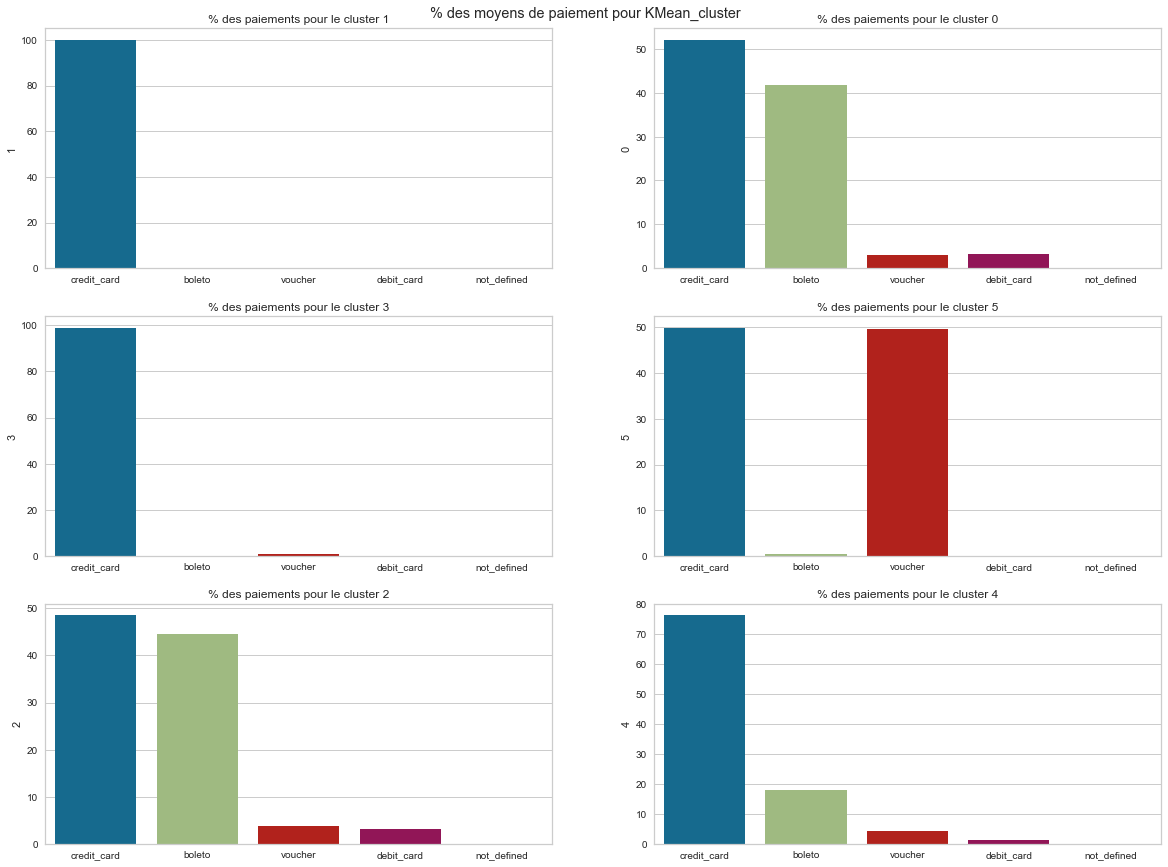

In [71]:
pai_clust(pay_perc, 'KMean_cluster')

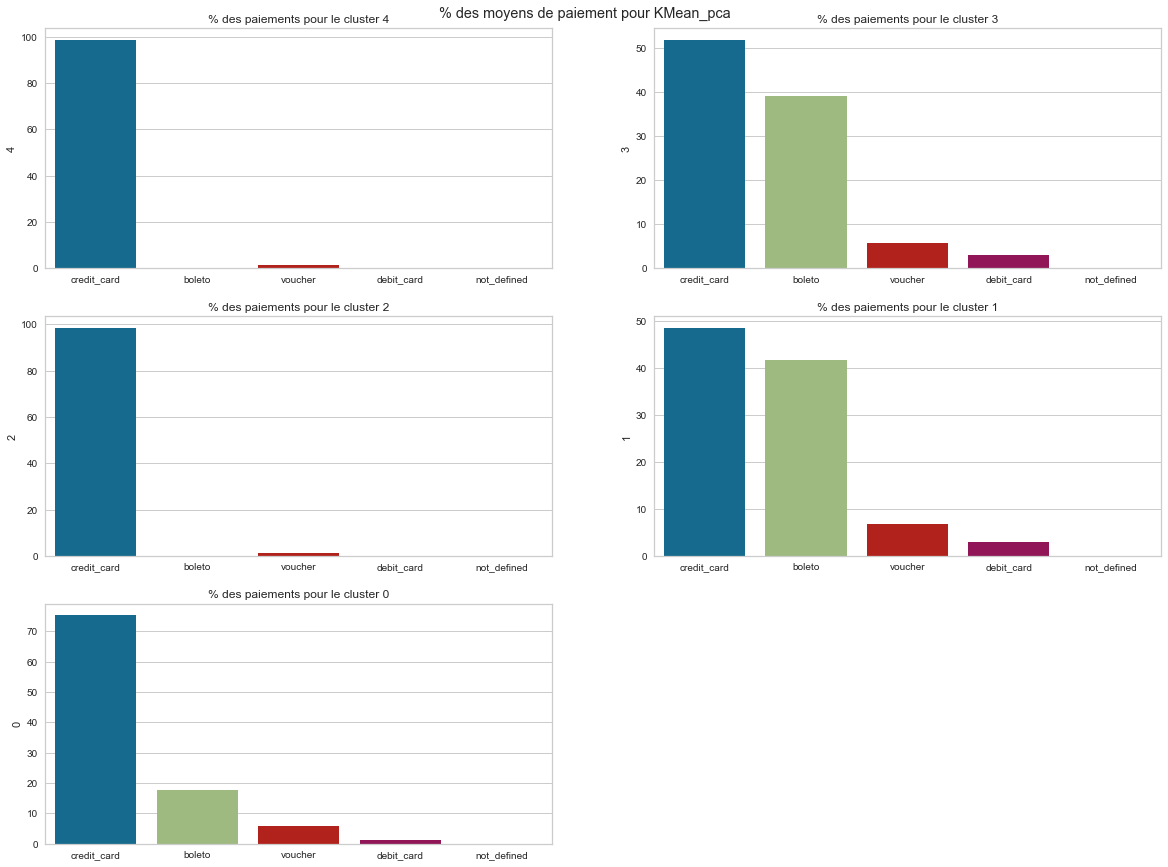

In [72]:
pai_clust(pay_perc_pca, 'KMean_pca')

### payments en plusieurs fois

In [73]:
clust_count['taille'] = data.groupby(
    'KMean_cluster').count()['customer_unique_id']
clust_countpca['taille'] = data.groupby(
    'KMean_pca').count()['customer_unique_id']

In [74]:
clust_count

,delay,mean_payment_value,mean_review_score,credit_card,boleto,voucher,debit_card,not_defined,auto,construction,...,sport,toys_and_baby,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes,plusieurs_payments_type,KMean_pca,taille
KMean_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000,3.834739e+06,156224.000000,17134.0,13714.0,971.0,1091.0,0.0,1549.0,2222.0,...,3276.0,2409.0,279,14.000000,1.780581e+07,0,0,0,98730,32910
1,0.000,7.381280e+06,173862.000000,38016.0,0.0,0.0,0.0,0.0,1577.0,2645.0,...,2804.0,2836.0,479,22.000000,2.419761e+07,38016,0,0,144476,38016
2,641.500,1.201878e+06,17370.000000,4509.0,4137.0,359.0,291.0,1.0,419.0,702.0,...,828.0,683.0,138,164.500000,5.600686e+06,0,63,0,9225,9229
3,0.000,1.609942e+06,8640.000000,7075.0,0.0,74.0,1.0,0.0,386.0,565.0,...,624.0,545.0,155,203.000000,5.067778e+06,7075,0,75,14150,7075
4,235174.175,4.209591e+05,11870.075817,4663.0,1103.0,271.0,74.0,0.0,181.0,387.0,...,664.0,357.0,46,31.000000,1.595345e+06,1889,2844,82,1,2844
5,5478.500,2.793473e+05,8229.333333,2010.0,17.0,1996.0,1.0,0.0,78.0,130.0,...,160.0,148.0,22,12.666667,1.232573e+06,548,58,1965,5480,1965


In [75]:
def perc_pop(df, var):

    x = df.index
    y = []

    for clus in x:

        y.append(df.at[clus, var]*100/df.at[clus, 'taille'])

    return y

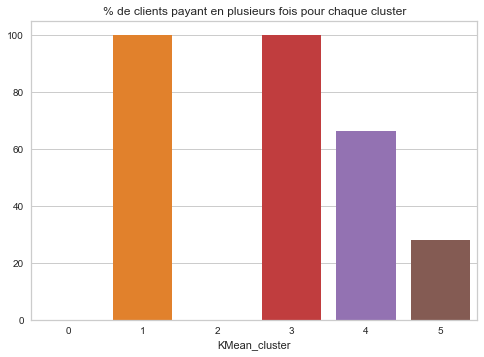

In [76]:
# modele avant pca
sns.barplot(x=clust_count.index, y=perc_pop(clust_count, 'pay_plus_fois'),
            palette=custompal)
title = plt.title('% de clients payant en plusieurs fois pour chaque cluster')

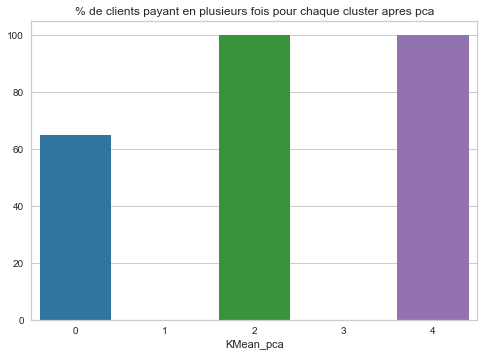

In [77]:
# modele apres pca
sns.barplot(x=clust_countpca.index, y=perc_pop(clust_countpca,
                                               'pay_plus_fois'),
            palette=custompal)
title = plt.title(
    '% de clients payant en plusieurs fois pour chaque cluster apres pca')

### Plusieurs payments type

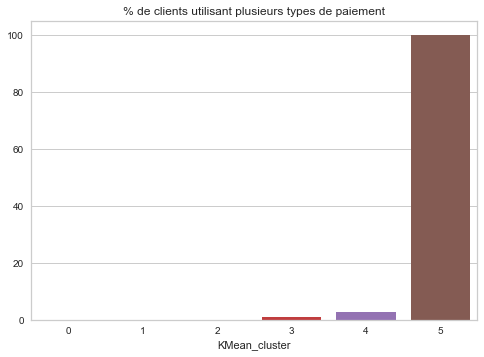

In [78]:
sns.barplot(x=clust_count.index, y=perc_pop(clust_count,
                                            'plusieurs_payments_type'),
            palette=custompal)
title = plt.title(
    '% de clients utilisant plusieurs types de paiement')

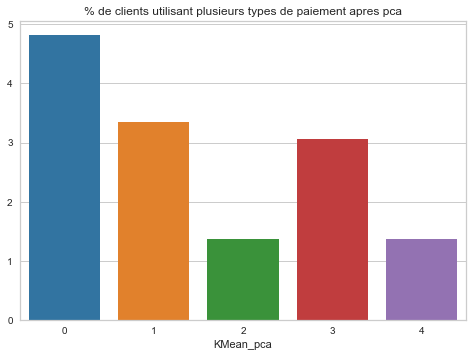

In [79]:
sns.barplot(x=clust_countpca.index, y=perc_pop(clust_countpca,
                                               'plusieurs_payments_type'),
            palette=custompal)
title = plt.title(
    '% de clients utilisant plusieurs types de paiement apres pca')

## Blackfriday

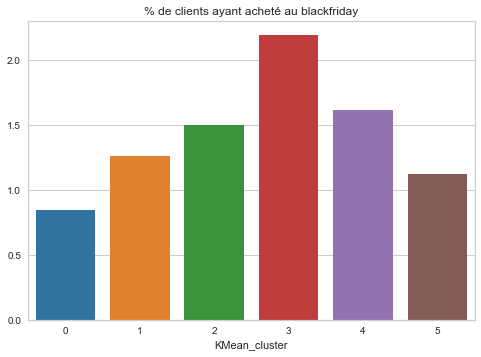

In [81]:
sns.barplot(x=clust_count.index, y=perc_pop(clust_count,
                                            'bfriday'),
            palette=custompal)
title = plt.title('% de clients ayant acheté au blackfriday')

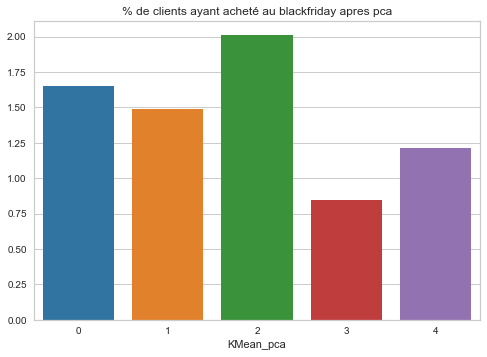

In [82]:
sns.barplot(x=clust_countpca.index, y=perc_pop(clust_countpca,
                                               'bfriday'),
            palette=custompal)
title = plt.title('% de clients ayant acheté au blackfriday apres pca')

## plusieurs commandes

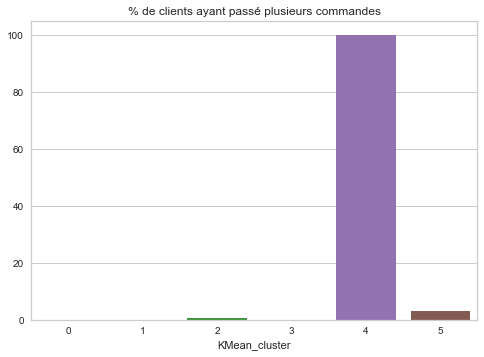

In [111]:
sns.barplot(x=clust_count.index, y=perc_pop(clust_count,
                                            'plusieurs_commandes'),
            palette=custompal)
title = plt.title(
    '% de clients ayant passé plusieurs commandes')

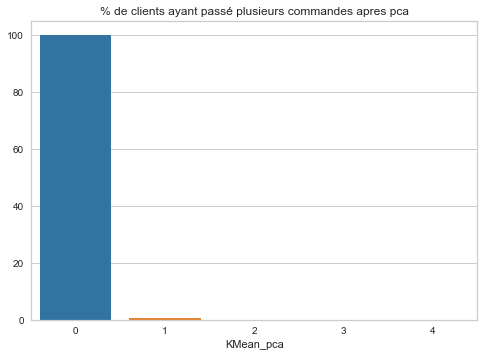

In [112]:
sns.barplot(x=clust_countpca.index, y=perc_pop(clust_countpca,
                                               'plusieurs_commandes'),
            palette=custompal)
title = plt.title(
    '% de clients ayant passé plusieurs commandes apres pca')

# DBScan

In [32]:
from sklearn.cluster import DBSCAN

In [114]:
# etudier silhouette avec differents params

In [33]:
epsilons = [0.3, 0.4, 0.5]
samples = [500, 600, 700, 800, 900, 1000]

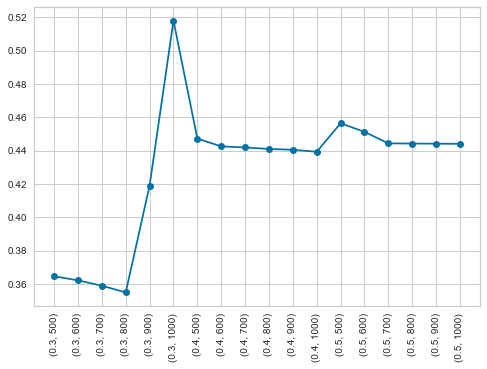

In [117]:
from sklearn import metrics

silhouettes = []
params = []

for epsilon in epsilons:

    for sample in samples:

        cls = DBSCAN(eps=epsilon, min_samples=sample)
        cls.fit(X_scale)
        silh = metrics.silhouette_score(X_scale, cls.labels_)
        silhouettes.append(silh)
        params.append((epsilon, sample))

plt.plot(silhouettes, marker='o')
xticks = plt.xticks(np.arange(len(params)),
                    labels=params, rotation=90)

In [118]:
db_model = DBSCAN(eps=0.3, min_samples=1000)
db_model.fit(X_scale)

DBSCAN(eps=0.3, min_samples=1000)

In [119]:
labels = db_model.labels_

In [120]:
nb_clust = len(set(labels)) - (1 if -1 in labels else 0)
nb_noise = list(labels).count(-1)

In [121]:
nb_clust

2

In [122]:
nb_noise

9219

In [123]:
data['DB_cluster'] = labels

In [124]:
X_pca['DB_cluster'] = labels

In [125]:
custompal[-1] = sns.color_palette('tab10')[6]

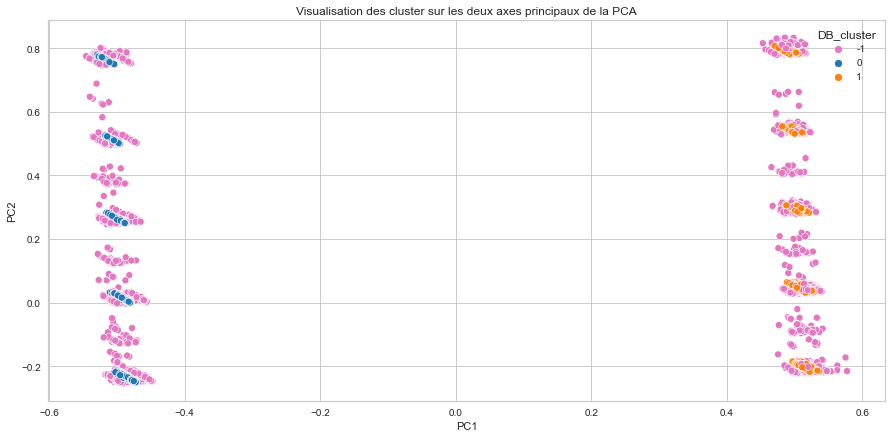

In [126]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_pca, x='PC1', y='PC2',
                hue='DB_cluster', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les deux axes principaux de la PCA')

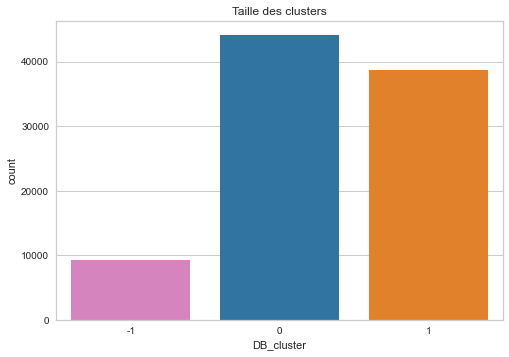

In [127]:
sns.countplot(data=data, x='DB_cluster', palette=custompal)
title = plt.title('Taille des clusters')

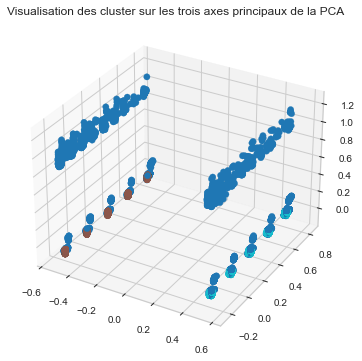

In [128]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette('tab10').as_hex())

x = X_pca.PC1
y = X_pca.PC2
z = X_pca.PC3

ax.scatter(x, y, z, s=40, c=X_pca.DB_cluster,
           marker='o', cmap=cmap, alpha=1)

plt.title('Visualisation des cluster sur les trois axes principaux de la PCA')
plt.show()

In [35]:
X_scale4

,PC1,PC2,PC3,PC4,KMean_pca
0,-0.473380,-0.248366,-0.029162,-0.146014,4
1,0.515551,0.031598,-0.017206,-0.157173,3
2,-0.491812,0.254620,-0.038941,-0.051076,2
3,-0.499288,0.024541,-0.089825,0.491826,4
4,-0.473518,-0.248056,-0.032093,-0.132254,4
...,...,...,...,...,...
92034,-0.495068,-0.227817,-0.081557,0.383122,4
92035,0.503347,0.046777,-0.055642,0.255527,3
92036,0.511030,-0.202775,-0.057137,0.264850,3
92037,-0.477622,-0.243392,-0.043599,-0.000992,4


In [36]:
X_pca4 = X_scale4.drop('KMean_pca', axis=1)

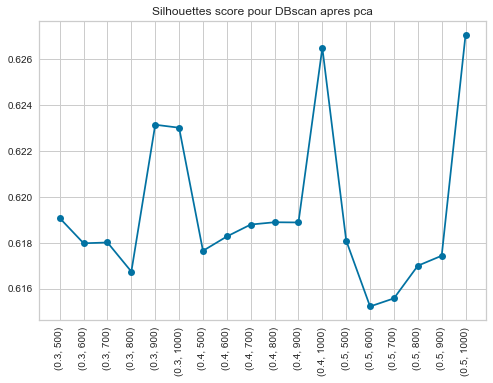

In [37]:
silhouettes = []
params = []

for epsilon in epsilons:

    for sample in samples:

        cls = DBSCAN(eps=epsilon, min_samples=sample)
        cls.fit(X_pca4)
        silh = metrics.silhouette_score(X_pca4, cls.labels_)
        silhouettes.append(silh)
        params.append((epsilon, sample))

plt.plot(silhouettes, marker='o')
plt.xticks(np.arange(len(params)), labels=params, rotation=90)
title = plt.title('Silhouettes score pour DBscan apres pca')

In [38]:
db_pca = DBSCAN(eps=0.4, min_samples=1000)
db_pca.fit(X_pca4)

DBSCAN(eps=0.4, min_samples=1000)

In [39]:
labels4 = db_pca.labels_

In [40]:
nb_clust = len(set(labels4)) - (1 if -1 in labels4 else 0)
nb_noise = list(labels4).count(-1)

In [41]:
nb_clust

3

In [42]:
nb_noise

1198

In [43]:
data['DB_cluster4'] = labels4

In [44]:
X_pca['DB_cluster4'] = labels4

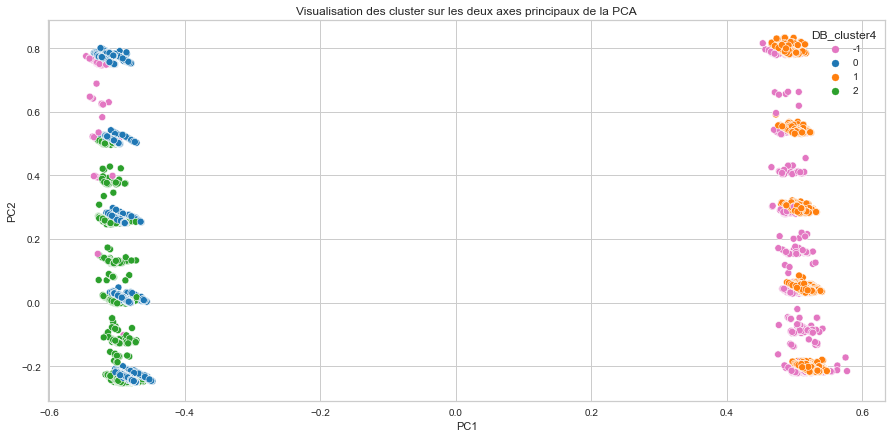

In [142]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_pca, x='PC1', y='PC2',
                hue='DB_cluster4', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les deux axes principaux de la PCA')

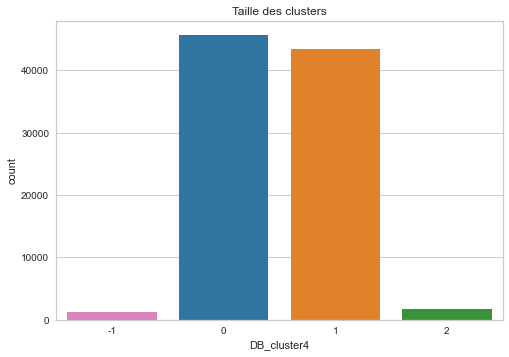

In [141]:
sns.countplot(data=data, x='DB_cluster4', palette=custompal)
title = plt.title('Taille des clusters')

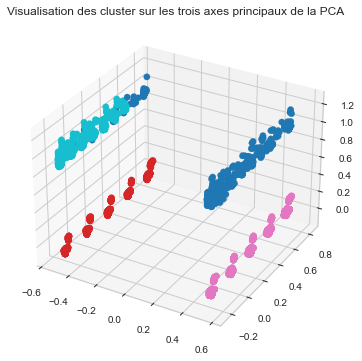

In [143]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

cmap = ListedColormap(sns.color_palette('tab10').as_hex())

x = X_pca.PC1
y = X_pca.PC2
z = X_pca.PC3

ax.scatter(x, y, z, s=40, c=X_pca.DB_cluster4, marker='o', cmap=cmap, alpha=1)
plt.title('Visualisation des cluster sur les trois axes principaux de la PCA')

plt.show()

In [145]:
X_pca[X_pca.PC3 > 0.4].DB_cluster4.unique()

array([ 2, -1], dtype=int64)

In [146]:
clust_countdb = data.groupby('DB_cluster4').sum()

In [147]:
pdt_perc_dbpca = pd.DataFrame(index=produits)

In [148]:
remplir_df(pdt_perc_dbpca, produits, 'DB_cluster4')

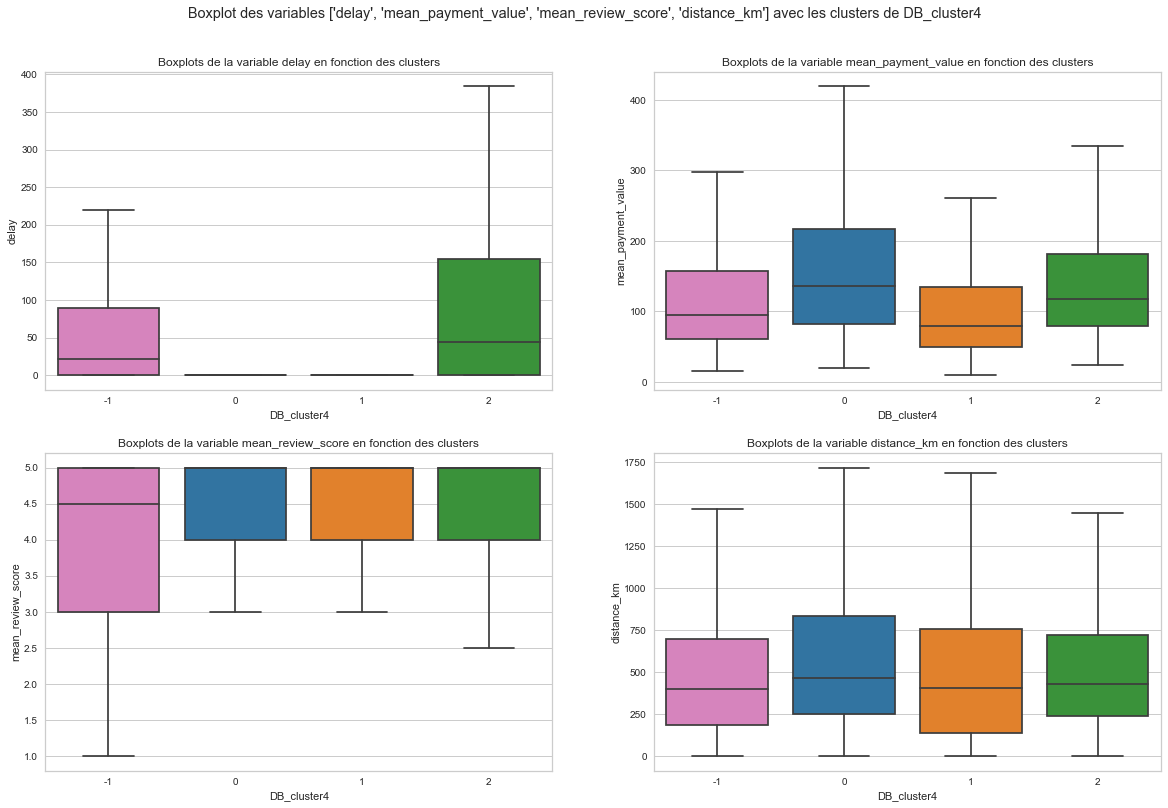

In [149]:
boxplot('DB_cluster4')

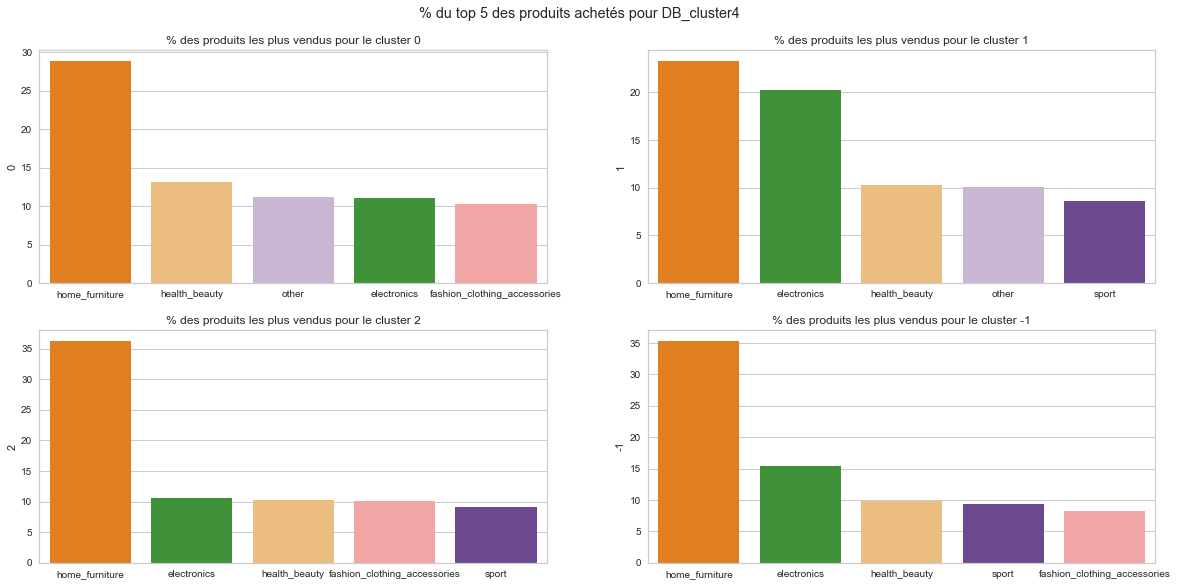

In [150]:
top_pdt('DB_cluster4')

In [151]:
pay_perc_dbpca = pd.DataFrame(index=payments)
remplir_df(pay_perc_dbpca, payments, 'DB_cluster4')

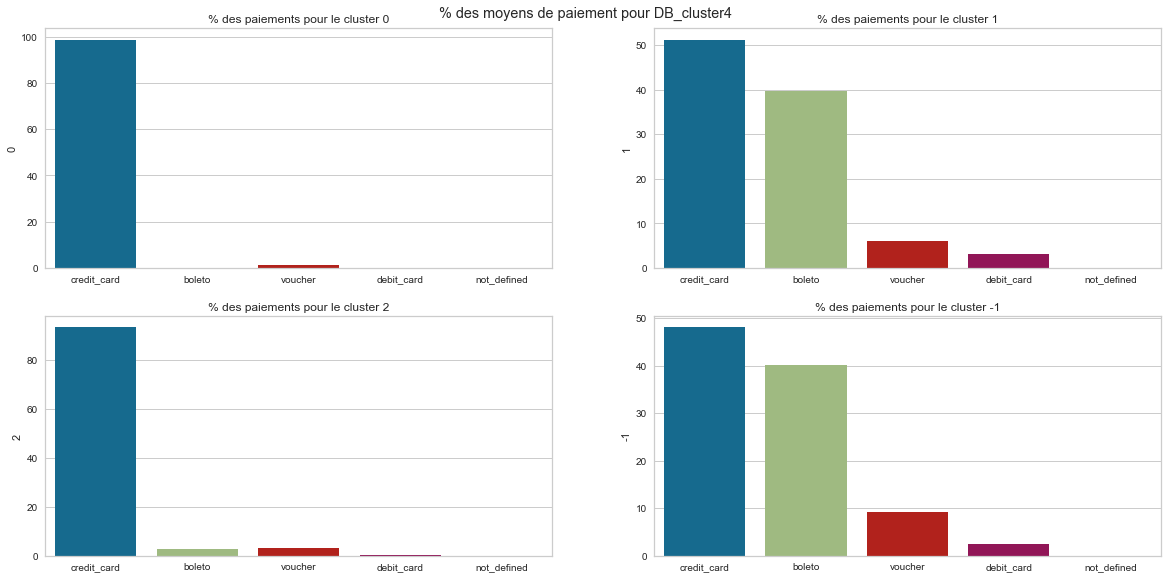

In [152]:
pai_clust(pay_perc_dbpca, 'DB_cluster4')

In [154]:
clust_countdb['taille'] = data.groupby(
    'DB_cluster4').count()['customer_unique_id']

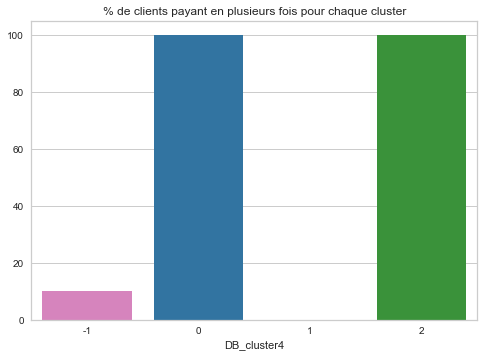

In [157]:
sns.barplot(x=clust_countdb.index, y=perc_pop(clust_countdb,
                                              'pay_plus_fois'),
            palette=custompal)
title = plt.title('% de clients payant en plusieurs fois pour chaque cluster')

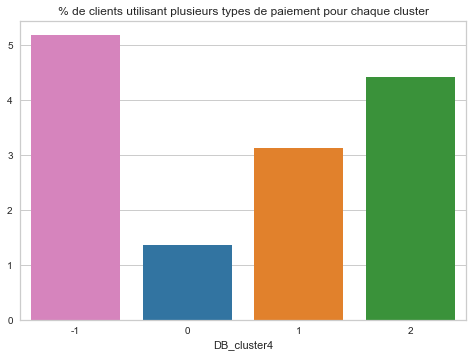

In [159]:
sns.barplot(x=clust_countdb.index, y=perc_pop(clust_countdb,
                                              'plusieurs_payments_type'),
            palette=custompal)
title = plt.title(
    '% de clients utilisant plusieurs types de paiement pour chaque cluster')

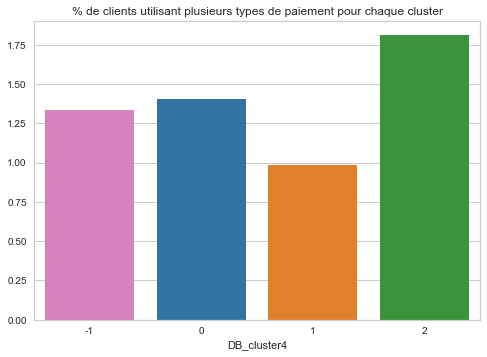

In [160]:
sns.barplot(x=clust_countdb.index, y=perc_pop(clust_countdb,
                                              'bfriday'),
            palette=custompal)
title = plt.title(
    '% de clients utilisant plusieurs types de paiement pour chaque cluster')

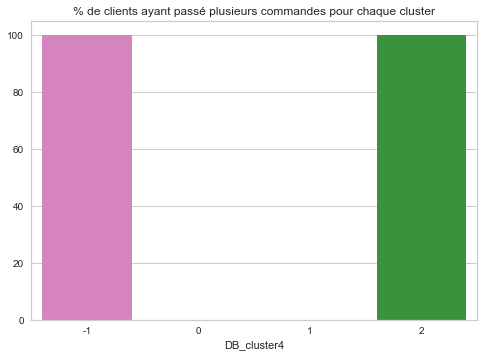

In [161]:
sns.barplot(x=clust_countdb.index, y=perc_pop(clust_countdb,
                                              'plusieurs_commandes'),
            palette=custompal)
title = plt.title(
    '% de clients ayant passé plusieurs commandes pour chaque cluster')

# hierarchique

In [162]:
from sklearn.cluster import AgglomerativeClustering

In [165]:
# echantillon de 50% des donénes pour raison de puissance de calcul
X_scalesample = pd.DataFrame(X_scale).sample(frac=0.5)

In [168]:
X_pcasample = pd.DataFrame(X_pca4).sample(frac=0.5)

In [169]:
X_pcasample

,PC1,PC2,PC3,PC4
82362,-0.507949,0.754555,-0.033496,-0.066046
34525,0.535028,-0.214932,-0.018066,-0.098364
12772,-0.485477,0.006475,-0.035904,-0.031263
20035,-0.498657,0.503069,-0.035166,-0.090602
30845,-0.499439,0.503911,-0.034636,-0.077269
...,...,...,...,...
55776,-0.472071,-0.249772,-0.028290,-0.171470
19759,0.509432,0.057004,-0.075391,0.512435
67828,-0.499380,0.023557,-0.087421,0.464138
50937,0.533941,-0.213756,-0.023619,-0.056093


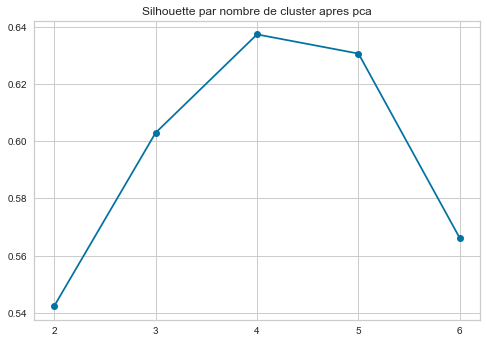

In [171]:
silhouettes = []
params = [2, 3, 4, 5, 6]

for nclust in params:

    cls = AgglomerativeClustering(n_clusters=nclust)
    cls.fit(X_pcasample)
    silh = metrics.silhouette_score(X_pcasample, cls.labels_)
    silhouettes.append(silh)

plt.plot(silhouettes, marker='o')
plt.xticks(np.arange(len(params)), labels=params)
title = plt.title('Silhouette par nombre de cluster apres pca')

In [172]:
X_scalesample = pd.DataFrame(X_scale).loc[X_pcasample.index]

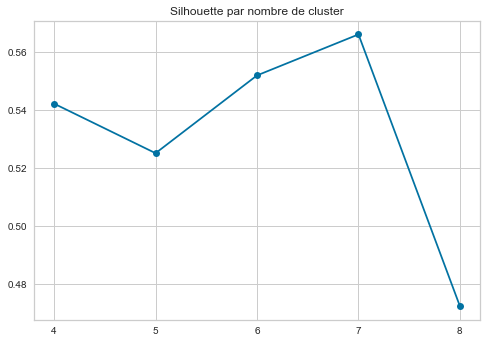

In [174]:
silhouettes = []
params = [4, 5, 6, 7, 8]

for nclust in params:

    cls = AgglomerativeClustering(n_clusters=nclust)
    cls.fit(X_scalesample)
    silh = metrics.silhouette_score(X_scalesample, cls.labels_)
    silhouettes.append(silh)

plt.plot(silhouettes, marker='o')
plt.xticks(np.arange(len(params)), labels=params)
title = plt.title('Silhouette par nombre de cluster')

In [186]:
hierar = AgglomerativeClustering(n_clusters=4)
hierar.fit(X_pcasample)

AgglomerativeClustering(n_clusters=4)

In [176]:
# pour voir car 7 trop pour le metier
hierar2 = AgglomerativeClustering(n_clusters=7)
hierar2.fit(X_scalesample)

AgglomerativeClustering(n_clusters=7)

In [187]:
hierar.labels_

array([0, 2, 1, ..., 1, 2, 3], dtype=int64)

In [178]:
hierar2.labels_

array([3, 2, 0, ..., 0, 2, 4], dtype=int64)

In [180]:
datasample = data.loc[X_pcasample.index]

In [181]:
datasample

,customer_unique_id,delay,mean_payment_value,mean_review_score,credit_card,boleto,voucher,debit_card,not_defined,auto,...,bfriday,mean_canceled,distance_km,pay_plus_fois,plusieurs_commandes,plusieurs_payments_type,KMean_cluster,KMean_pca,DB_cluster,DB_cluster4
82362,e4c86e662d2175b91ad7c9615024b408,0.0,110.46,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,536.330737,1,0,0,3,2,0,0
34525,5f89b3a4aba31dd11e5419af3cc3c7b0,0.0,103.55,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,188.352500,0,0,0,0,3,1,1
12772,23605dce972b195b2955d4d2b99430f1,0.0,198.03,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,565.655996,1,0,0,1,4,0,0
20035,379634bbb8d01b2b2c91db9cfc4655e0,0.0,107.78,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,408.303759,1,0,0,3,2,0,0
30845,55845d91497951227fd70e450ffb35e0,0.0,142.21,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,459.101255,1,0,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55776,9ad4dda4f07ffe69cea5cb32bcd1d650,0.0,27.77,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,15.061365,1,0,0,1,4,0,0
19759,36c609d445f089d31d4f0d39a93db684,0.0,144.00,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,2449.767065,0,0,0,0,3,1,1
67828,bc51a138200e5b50efd356b21a60ff23,0.0,240.82,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,2366.829988,1,0,0,1,4,0,0
50937,8dc6069f6ce4934d2dfcb6439a513c93,0.0,115.70,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,339.450053,0,0,0,0,3,1,1


In [191]:
X_pcasample['pca_clus'] = hierar.labels_
X_pcasample['scale_clus'] = hierar2.labels_

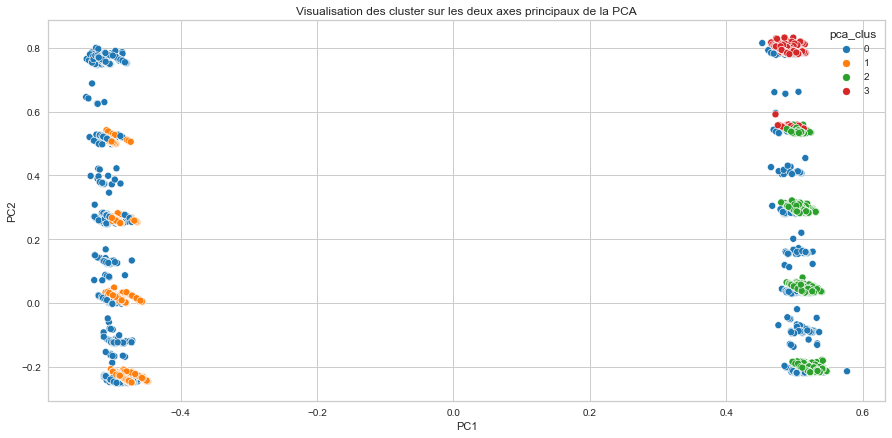

In [189]:
fig = plt.figure(figsize=(15, 7))
sns.scatterplot(data=X_pcasample, x='PC1', y='PC2',
                hue='pca_clus', palette=custompal)
title = plt.title(
    'Visualisation des cluster sur les deux axes principaux de la PCA')

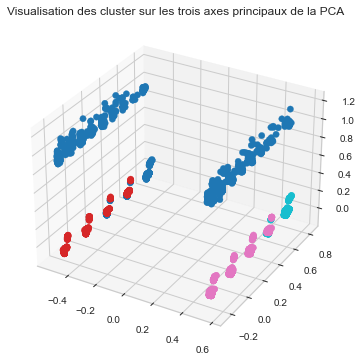

In [190]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

x = X_pcasample.PC1
y = X_pcasample.PC2
z = X_pcasample.PC3

ax.scatter(x, y, z, s=40, c=X_pcasample.pca_clus,
           marker='o', cmap=cmap, alpha=1)
plt.title('Visualisation des cluster sur les trois axes principaux de la PCA')

plt.show()

In [194]:
# 7 clusters etants beaucoup trop on ne regardera pas l'autre clustering.

# evolution temps

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
pipe = Pipeline([('scaler', preprocessing.MinMaxScaler()),
                 # pca qui garde composants pour expliquer >85% variance
                 ('pca', PCA(n_components=0.85, svd_solver='full')),
                 ('clustering', KMeans(n_clusters=5, random_state=42))])

In [88]:
# recup données en ajoutant mois par mois
dic_df_2017 = {'data_{}_2017'.format(mois):
               pd.read_csv('Data/customers_explore_{}_2017.csv'.format(mois))
               for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [89]:
dic_X_2017 = {'X_{}_2017'.format(mois): dic_df_2017[
    'data_{}_2017'.format(mois)].drop('customer_unique_id', axis=1)
              for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

In [90]:
dic_cluster_2017 = {}
dic_Xscale_pca_2017 = {}
ncomponents = []

for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    X = dic_X_2017['X_{}_2017'.format(mois)]
    mod_fit = pipe.fit(X)
    dic_cluster_2017['cluster_{}_2017'.format(mois)] = mod_fit.predict(X)
    dic_Xscale_pca_2017['Xscale_pca_{}_2017'.format(mois)] = mod_fit[
        'pca'].transform(mod_fit['scaler'].transform(X))
    ncomponents.append(mod_fit['pca'].n_components_)

In [91]:
ncomponents

[7, 6, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5]

In [92]:
for key, clu in zip(dic_df_2017, dic_cluster_2017):

    dic_df_2017[key]['cluster'] = dic_cluster_2017[clu]

In [95]:
ari_2017 = []

for mois in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    df_mois = dic_df_2017['data_{}_2017'.format(mois)]
    df_moism1 = dic_df_2017['data_{}_2017'.format(mois-1)]
    df_commun = df_mois[df_mois.customer_unique_id.isin(
        df_moism1.customer_unique_id.unique())]
    ari_2017.append(metrics.adjusted_rand_score(
        df_moism1.sort_values(by='customer_unique_id').cluster,
        df_commun.sort_values(by='customer_unique_id').cluster))

In [96]:
ari_2017

[0.7684869186931159,
 0.9982425481020429,
 0.9975164166847146,
 0.9977758488592438,
 0.9974903804403152,
 0.9962362025247441,
 0.9972196175706153,
 0.9718060959971093,
 0.9970688266573261,
 0.9606356764487143,
 0.9120450012476548]

In [97]:
dic_df_2018 = {'data_{}_2018'.format(mois):
               pd.read_csv('Data/customers_explore_{}_2018.csv'.format(mois))
               for mois in [1, 2, 3, 4, 5, 6, 7, 8]}

In [98]:
dic_X_2018 = {'X_{}_2018'.format(mois): dic_df_2018[
    'data_{}_2018'.format(mois)].drop('customer_unique_id', axis=1)
              for mois in [1, 2, 3, 4, 5, 6, 7, 8]}

In [99]:
dic_cluster_2018 = {}
dic_Xscale_pca_2018 = {}
ncomponents = []

for mois in [1, 2, 3, 4, 5, 6, 7, 8]:

    X = dic_X_2018['X_{}_2018'.format(mois)]
    mod_fit = pipe.fit(X)
    dic_cluster_2018['cluster_{}_2018'.format(mois)] = mod_fit.predict(X)
    dic_Xscale_pca_2018['Xscale_pca_{}_2018'.format(mois)] = mod_fit[
        'pca'].transform(mod_fit['scaler'].transform(X))
    ncomponents.append(mod_fit['pca'].n_components_)

In [100]:
ncomponents

[5, 5, 4, 4, 4, 4, 4, 4]

In [101]:
for key, clu in zip(dic_df_2018, dic_cluster_2018):

    dic_df_2018[key]['cluster'] = dic_cluster_2018[clu]

In [102]:
ari_2018 = []

for mois in [2, 3, 4, 5, 6, 7, 8]:

    df_mois = dic_df_2018['data_{}_2018'.format(mois)]
    df_moism1 = dic_df_2018['data_{}_2018'.format(mois-1)]
    df_commun = df_mois[df_mois.customer_unique_id.isin(
        df_moism1.customer_unique_id.unique())]
    ari_2018.append(metrics.adjusted_rand_score(
        df_moism1.sort_values(by='customer_unique_id').cluster,
        df_commun.sort_values(by='customer_unique_id').cluster))

In [103]:
ari_2018

[0.9194077469420887,
 0.9158090611637297,
 0.9961277022827933,
 0.995901451517624,
 0.9964149132898316,
 0.9971436446848335,
 0.997168454207496]

In [104]:
df_commun = dic_df_2018['data_1_2018'][
    dic_df_2018['data_1_2018'].customer_unique_id.isin(
        dic_df_2017['data_12_2017'].customer_unique_id.unique())]

ari_2017_2018 = metrics.adjusted_rand_score(
    dic_df_2017['data_12_2017'].sort_values(by='customer_unique_id').cluster,
    df_commun.sort_values(by='customer_unique_id').cluster)

In [105]:
ari_2017_2018

0.9952447967353868

In [156]:
ari_tot = ari_2017

In [158]:
ari_tot += [ari_2017_2018]
ari_tot += ari_2018

In [159]:
ari_tot

[0.7684869186931159,
 0.9982425481020429,
 0.9975164166847146,
 0.9977758488592438,
 0.9974903804403152,
 0.9962362025247441,
 0.9972196175706153,
 0.9718060959971093,
 0.9970688266573261,
 0.9606356764487143,
 0.9120450012476548,
 0.9952447967353868,
 0.9194077469420887,
 0.9158090611637297,
 0.9961277022827933,
 0.995901451517624,
 0.9964149132898316,
 0.9971436446848335,
 0.997168454207496]

In [183]:
mois = ['fev-2017', 'mars-2017', 'avr-2017', 'mai-2017', 'juin-2017',
        'juill-2017', 'aout-2017', 'sept-2017', 'oct-2017', 'nov-2017',
        'dec-2017', 'jan-2018', 'fev-2018', 'mars-2018', 'avr-2018',
        'mai-2018', 'juin-2018', 'juill-2018', 'aout-2018']

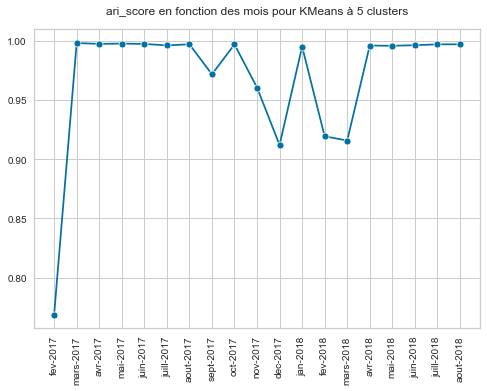

In [184]:
ax = sns.lineplot(x=np.arange(19), y=ari_tot, marker='o')
ax.set_xticks(np.arange(19))
ax.set_xticklabels(mois, rotation=90)
plt.title('ari_score en fonction des mois pour KMeans à 5 clusters',
          y=1.03)
plt.show()

In [106]:
silhouette_2017 = [metrics.silhouette_score(
    dic_Xscale_pca_2017['Xscale_pca_{}_2017'.format(mois)],
    dic_cluster_2017['cluster_{}_2017'.format(mois)])
                   for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

In [107]:
silhouette_2017

[0.48106102951166335,
 0.5493944953700317,
 0.5851104356451131,
 0.5786172883297248,
 0.5771032559432474,
 0.579271394925592,
 0.6015617623979287,
 0.6013876248121619,
 0.597049362766036,
 0.5968563191796316,
 0.5676138649812148,
 0.5872870876830891]

In [108]:
silhouette_2018 = [metrics.silhouette_score(
    dic_Xscale_pca_2018['Xscale_pca_{}_2018'.format(mois)],
    dic_cluster_2018['cluster_{}_2018'.format(mois)])
                   for mois in [1, 2, 3, 4, 5, 6, 7, 8]]

In [109]:
silhouette_2018

[0.5895072278483721,
 0.6042700258520334,
 0.628524446049383,
 0.6269513990465376,
 0.6287484501379633,
 0.629939465724174,
 0.6307137294919013,
 0.6327619762654301]

In [110]:
metrics.silhouette_score(X_scale4.drop('KMean_pca', axis=1),
                         X_scale4.KMean_pca)

0.6326804527884509

In [122]:
siltot = silhouette_2017

In [123]:
siltot += silhouette_2018

In [145]:
siltot

[0.48106102951166335,
 0.5493944953700317,
 0.5851104356451131,
 0.5786172883297248,
 0.5771032559432474,
 0.579271394925592,
 0.6015617623979287,
 0.6013876248121619,
 0.597049362766036,
 0.5968563191796316,
 0.5676138649812148,
 0.5872870876830891,
 0.5895072278483721,
 0.6042700258520334,
 0.628524446049383,
 0.6269513990465376,
 0.6287484501379633,
 0.629939465724174,
 0.6307137294919013,
 0.6327619762654301]

In [185]:
mois = ['jan-2017', 'fev-2017', 'mars-2017', 'avr-2017', 'mai-2017',
        'juin-2017', 'juill-2017', 'aout-2017', 'sept-2017', 'oct-2017',
        'nov-2017', 'dec-2017', 'jan-2018', 'fev-2018', 'mars-2018',
        'avr-2018', 'mai-2018', 'juin-2018', 'juill-2018', 'aout-2018']

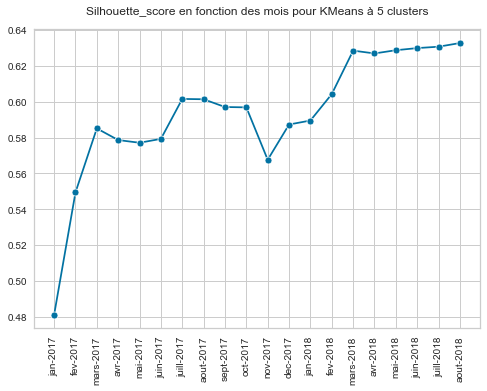

In [181]:
ax = sns.lineplot(x=np.arange(20), y=siltot, marker='o')
ax.set_xticks(np.arange(20))
ax.set_xticklabels(mois, rotation=90)
plt.title('Silhouette_score en fonction des mois pour KMeans à 5 clusters',
          y=1.03)
plt.show()

In [111]:
pipe_elbow = Pipeline([('scaler', preprocessing.MinMaxScaler()),
                       ('pca', PCA(n_components=0.85, svd_solver='full')),
                       ('clustering', KElbowVisualizer(KMeans(random_state=42),
                                                       k=10))])

In [121]:
kelbow_2017 = {}
score_2017 = {}

for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    X = dic_X_2017['X_{}_2017'.format(mois)]
    mod_fit = pipe_elbow.fit(X)
    kelbow_2017['kopti_{}_2017'.format(mois)] = mod_fit[
        'clustering'].elbow_value_
    score_2017['scoreopti_{}_2017'.format(mois)] = mod_fit[
        'clustering'].elbow_score_

In [113]:
score_2017_2 = {}

for mois in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:

    X = dic_X_2017['X_{}_2017'.format(mois)]
    mod_fit = pipe_elbow.fit(X)
    score_2017_2['scoreopti_{}_2017'.format(mois)] = mod_fit[
        'clustering'].elbow_score_ / X.shape[0]

In [114]:
score_2017_2

{'scoreopti_1_2017': 0.15154267373919245,
 'scoreopti_2_2017': 0.09955570094010822,
 'scoreopti_3_2017': 0.0856449918426042,
 'scoreopti_4_2017': 0.08829380920904635,
 'scoreopti_5_2017': 0.08991741956631523,
 'scoreopti_6_2017': 0.08973021678658549,
 'scoreopti_7_2017': 0.06640827158322964,
 'scoreopti_8_2017': 0.08442598733849854,
 'scoreopti_9_2017': 0.08410754396925949,
 'scoreopti_10_2017': 0.08431392982963347,
 'scoreopti_11_2017': 0.11348434396015292,
 'scoreopti_12_2017': 0.0909295068218893}

In [115]:
kelbow_2017

{'kopti_1_2017': 5,
 'kopti_2_2017': 5,
 'kopti_3_2017': 5,
 'kopti_4_2017': 5,
 'kopti_5_2017': 5,
 'kopti_6_2017': 5,
 'kopti_7_2017': 5,
 'kopti_8_2017': 4,
 'kopti_9_2017': 4,
 'kopti_10_2017': 4,
 'kopti_11_2017': 4,
 'kopti_12_2017': 5}

In [116]:
score_2017

{'scoreopti_1_2017': 157.75592336249935,
 'scoreopti_2_2017': 265.61461010820875,
 'scoreopti_3_2017': 440.4721930465134,
 'scoreopti_4_2017': 649.577554350954,
 'scoreopti_5_2017': 964.9038293661288,
 'scoreopti_6_2017': 1227.5093656404895,
 'scoreopti_7_2017': 1153.3124525859491,
 'scoreopti_8_2017': 1801.3972918415434,
 'scoreopti_9_2017': 2125.649958735095,
 'scoreopti_10_2017': 2487.5138717636764,
 'scoreopti_11_2017': 4136.617821691534,
 'scoreopti_12_2017': 3789.850914829524}

In [117]:
kelbow_2018 = {}
score_2018 = {}
score_2018_2 = {}

for mois in [1, 2, 3, 4, 5, 6, 7, 8]:

    X = dic_X_2018['X_{}_2018'.format(mois)]
    mod_fit = pipe_elbow.fit(X)
    kelbow_2018['kopti_{}_2018'.format(mois)] = mod_fit[
        'clustering'].elbow_value_
    score_2018['scoreopti_{}_2018'.format(mois)] = mod_fit[
        'clustering'].elbow_score_
    score_2018_2['scoreopti_{}_2018_2'.format(mois)] = mod_fit[
        'clustering'].elbow_score_ / X.shape[0]

In [118]:
kelbow_2018

{'kopti_1_2018': 5,
 'kopti_2_2018': 4,
 'kopti_3_2018': 5,
 'kopti_4_2018': 5,
 'kopti_5_2018': 5,
 'kopti_6_2018': 5,
 'kopti_7_2018': 5,
 'kopti_8_2018': 5}

In [119]:
score_2018

{'scoreopti_1_2018': 4353.964556082374,
 'scoreopti_2_2018': 6083.732215306216,
 'scoreopti_3_2018': 3769.5960828506945,
 'scoreopti_4_2018': 4111.568448560294,
 'scoreopti_5_2018': 4446.164026320027,
 'scoreopti_6_2018': 4775.604659460398,
 'scoreopti_7_2018': 5118.722277038383,
 'scoreopti_8_2018': 5427.523690876127}

In [120]:
score_2018_2

{'scoreopti_1_2018_2': 0.08999513344527436,
 'scoreopti_2_2018_2': 0.11138082816693609,
 'scoreopti_3_2018_2': 0.06147015985341293,
 'scoreopti_4_2018_2': 0.060604166215531365,
 'scoreopti_5_2018_2': 0.05982298681843905,
 'scoreopti_6_2018_2': 0.059596723649233733,
 'scoreopti_7_2018_2': 0.05950549606536059,
 'scoreopti_8_2018_2': 0.058969824649074055}

In [165]:
kelbow_tot = kelbow_2017

In [168]:
for key, value in kelbow_2018.items():

    kelbow_tot[key] = value

In [172]:
x, y = zip(*kelbow_tot.items())

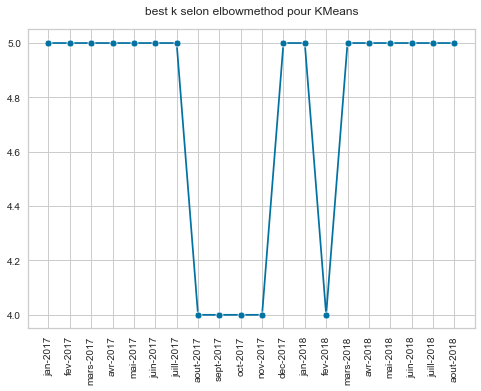

In [180]:
ax = sns.lineplot(x=np.arange(len(y)), y=y, marker='o')
ax.set_xticks(np.arange(len(y)))
ax.set_xticklabels(mois, rotation=90)
plt.title('best k selon elbowmethod pour KMeans',
          y=1.03)
plt.show()

In [186]:
score_tot = score_2017_2

In [187]:
for key, value in score_2018_2.items():

    score_tot[key] = value

In [188]:
x, y = zip(*score_tot.items())

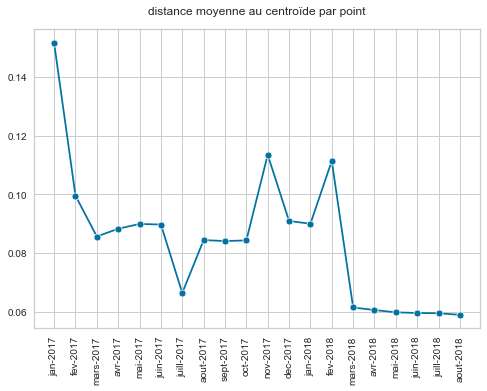

In [190]:
ax = sns.lineplot(x=np.arange(len(y)), y=y, marker='o')
ax.set_xticks(np.arange(len(y)))
ax.set_xticklabels(mois, rotation=90)
plt.title('distance moyenne au centroïde par point',
          y=1.03)
plt.show()

Les distances sont 'petites' puisque toutes nos valeurs sont entre 0 et 1 apres le MinMaxScaler mais on peut voir une augmentation au mois de nov et fev